# The traveling purchaser problem with fast service option
Daniele Fossemò, 280966, A.A. 2021/2022

<p>Before starting to talking about what the <b>traveling purchaser problem with fast service option</b> (<b>TPP-FSO</b>) is, it's needed to define the most general <b>traveling purchaser problem</b> (<b>TPP</b>), which is itself a generalization of the <b>traveling salesman problem</b> (<b>TSP</b>).</p>

<p>In the TPP, a purchaser must visit a number of markets (each market can be visited once at most) in order to satisfy the demand requirement for a number of products. Each product is available in different quantities on a subset of markets, where the unit cost of the product depends on the market (the demand of a product can be met from multiple markets). The aim of the purchaser is to design a route plan for market visits in order to satisfy the demand of each product with the minimum total of purchasing and traveling costs.</p>

<p> The <b>TPP-FSO</b> it's like TPP but with the addition that the purchaser have the fast and standard service option. In standard service, the purchaser collects the products at the market by himself, while the products are prepared before in the faster service option with a fixed additional payment. Therefore, a fast service option allows an opportunity for the purchaser to complete the purchasing operation in shorter times with extra cost. Finally, the TPP-FSO can be extended considering that fast service cost could be not fixed for all products, but depend on them and the amount of purchased.</p>

<p><b>Note</b>: Even if we are talking about TSP, in the course the ATSP has been made, so the instances and modelization proposed are thought with directed graph. That said, if one has a symmetric graph just have to convert it into a directed one by replacing each edge $e = \{i, j\}$ in $E$ with two directed arcs $(i, j)$ and setting attributes over the new two directed arcs with the same value. So, from now on, in the TPP and TPP-FSO will be referred as <b>ATPP</b> and <b>ATPP-FSO</b></p>

<p><b>Note</b>: Note that it is assumed that the total available quantity of a product in the markets is at least the amount of its demand to guarantee a feasible purchasing plan with respect to the product demand (Manerba et al., 2017). For the same reason, it is additionally assumed that the duration time limit of the purchaser is large enough to find a feasible solution for the problem. It's also assumed that at each node correspond exactly one market.</p>

## ATPP-FSO

>**Given**
>
>A directed graph $G=(N,A)\;$, a cost (length, distance) $c_{ij} > 0$ and a traveling time $t_{ij} >= 0$ for each arc in $A$;
>
>A set of markets $M$ (supplier, nodes*) and a set of products $K$ (items) whit a certain demand $d_{k} >= 0$ which are available in the subset of markets $M_{k}$ with a certain availability $q_{ik} >= 0$, standard time of service $sp'_{ik} >= 0$, fast time of service $sp''_{ik} >= 0$ (with price $hp_{ik}$ if choosen) and price $p_{ik} > 0$;
>
>a duration time limit of the purchaser $D$.
>
>**Find**
>
> The tour (a directed cycle that touches exactly once all $n$ nodes) which allows the purchaser to satisfy the demand of products with minimum cost (distance between edges plus the costs of products bought during the tour).
>


### Formulation

Decision variables:
$$
x_{ij} = \begin{cases}1 \text{ if arc $(i, j)$ is in the tour} \\
0 \text{ otherwise}
\end{cases}
$$

$$
y_{i} = \begin{cases}1 \text{ if market $i$ is visited} \\
0 \text{ otherwise}
\end{cases}
$$

$$
o_{i} = \begin{cases}1 \text{ if fast service option is selected at market $i$} \\
0 \text{ otherwise}
\end{cases}
$$

$$
z_{ik} = \text{amount of product $k$ purchased from market $i$}
$$

$$
r_{i} = \text{arrival time of purchaser at node $i$}
$$

$$
op_{i} = \text{total fast service cost purchased at market $i$}
$$

$$
sp_{i} = \text{total service time of purchaser at market $i$}
$$

Formulation:
$$
\begin{alignat}{3}
& \min \sum_{(i,j) \in A} c_{ij} x_{ij} + \sum_{i \in M} op_{i} + \sum_{k \in K} \sum_{i \in M(k)} p_{ik} z_{ik} &\\
\text{s.t.} \;\;\;\;\;&\\
\sum_{j \in \delta^+(i)} x_{ij} &= y_{i} \;\; \forall \; i \in M \;\; \text{(1)}\\
\sum_{j \in \delta^-(i)} x_{ji} &= y_{i} \;\; \forall \; i \in M \;\; \text{(2)}\\
\sum_{j \in \delta^+(1)} x_{1j} &= 1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{(3)}\\
\sum_{j \in \delta^-(1)} x_{j1} &= 1 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{(4)}\\
\sum_{i \in M_k} z_{ik} &= d_{k} \;\; \forall \; k \in K \; \; \text{(5)}\\
\end{alignat}
$$
<br>
$$
\begin{alignat}{3}
z_{ik} \le q_{ik}y_{i} \;\; \forall \; k \in K, \; \; \forall \; i \in M_{k} \; \; \text{(6)}\\
r_{i}+sp_{i}+t_{ij}x_{ij} \le r_{j} + D(1 - x_{ij}) \; \; \forall \; i, j \in M, \; \; i \ne j \; \; \text{(7)}\\
t_{1j}x_{1j} \le r_{j} + D(1 - x_{1j}) \; \; \forall \; j \in M \; \; \text{(8)}\\
r_{i} + sp_{i}+t_{i1}x_{i1} \le r_{1} + D(1 - x_{i1}) \; \; \forall \; i \in M \; \; \text{(9)}\\
r_{1} \le D \; \; \text{(10)}\\
\end{alignat}
$$
<br>
$$
\begin{alignat}{3}
sp_{i} >= \sum_{k \in K} sp'_{ik} z_{ik} - D o_{i} \; \; \forall \; i \in M \; \; \text{(11)}\\
sp_{i} >= \sum_{k \in K} sp''_{ik} z_{ik} - D (1 - o_{i}) \; \; \forall \; i \in M \; \; \text{(12)}\\
op_{i} >= \sum_{k \in K} hp_{ik} z_{ik} - \sum_{k \in K} hp_{ik}q_{ik} (1 - o_{i}) \; \; \forall \; i \in M \; \; \text{(13)}\\
\end{alignat}
$$
<br>
$$
\begin{alignat}{3}
x \in \{0,1\}^{|A|} \; \; \text{(14)}\\
y \in \{0,1\}^{|N|} \; \; \text{(15)}\\
o \in \{0,1\}^{|N|} \; \; \text{(16)}\\
z_{ik} \ge 0 \; \; \forall \; k \in K, \; \; i \in M_{k} \; \; \text{(17)}\\
r_{i} \ge 0 \; \; \forall \; i \in N \; \; \text{(18)}\\
op_{i} \ge 0 \; \; \forall \; i \in M \; \; \text{(19)}\\
sp_{i} \ge 0 \; \; \forall \; i \in M \; \; \text{(20)}\\
\end{alignat}
$$

<p>The objective function it's like the ATSP one, but with the addition of minimizing the cost given by the products bought by the purchaser during the tour and the cost arised by the fast service option when used.</p>
<p>Constraints (1) and (2) are like the FS and the RS in TSP, but considering that the purchaser pass only trought the nodes in which he's interested to (so in the markets in which he wants to buy products). Constraints (3) and (4) guarantee that the tour starts and ends at the depot node. Constraints (5) guarantee that for each product the demand it's satisfied. Constraint (6) ensures that the purchased amount of product k cannot exceed the corresponding availability in the market.</p>
<p>Constraints (7), (8) and (9) work similarly to the Miller-Tucker-Zemlin lifted formulation and determine the purchaser arrival times at nodes. Consider, for example the constraint (7): if $x_{ij}$ = 1 and therefore $D$(1-$x_{ij}$) = $D$(1 - 1) = 0 then the constraint just defines an appropriate lower bound for $r_{j}$ in respect to the tour definition; if instead $x_{ij} = 0$ it just define that the time of arrival to any of $i$ or $j$ node can't exceed the time limit $D$ (regardless of whether $i$ comes before $j$). Constraint (10) just defines that the arrival time at the end of the tour must be at most the time limit $D$</p>
<p>Constraint (11) and (12) calculate the total service time for the purchaser at any market. If faster service is used, then $o_{i}$ = 1 (and $1 - o_{i}$ = 0) so the lower bound will be given by (12) which will be a higher lower bound for the market $i$. If $o_{i}$ = 0 then the lower bound will be given by (11). Because of (7) and (9) $sp_{i}$ will keep as value exactly his lower bound.</p> 
</p>Constraint (13) determines the total fast service cost at any market, considering whenever fast service it's used or not in the market. considering that the $o_{i}$ will keep as value his lower bound because it appears in the objective function, if $o_{i}$ = 1 then $op_{i}$ is determined by cost of fast service of the products bought at the market (because ($1-o_{i}$) = 0), else $op_{i}$ is zero, because (13) will have a value $\le$ 0 (because $z_{ik} \le q_{ik}$ for (6) but $op_{i} \ge 0$ for (19)).</p>
<p>Finally, constraints from (14) to (20) are the binary and non-negativity conditions of the decision variables</p>

<p><b>Note</b>: differently to the ATSP, in this case the purchaser may not make a tour of all nodes, but just of the nodes he needs, that is the nodes in which there are the markets in which the purchaser is interested are located.</p>

### Data Collection

The data collected to make experiments are collected at https://data.mendeley.com/datasets/wy5bjtt47v/1 and are parsed to be managed with networkx python package. The Program made for the parsing is ./Examples/Parsing_istances.ipynb. For the moment Experiment will be done with graph with 50 nodes and 50 products in order to avoid too much time of execution. The objective it's to create a gurobi model like the one described before and estimate the time of execution

<p><b>Note</b>: I didn't create random graphs because I found these data on the internet (which should be the same used in the paper) and I thought that i could be interesting show how the time complexity behave in this problem, but as you can see in above cells unfortunately i had some problem with gurobi license. I will show anyway (with small examples) how time execution behaves with the grows of instances.</p>

In [30]:
import gurobipy as gb
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os


#
# Drawing 
# functions
#


def DrawInitG(G, withedges=False):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(float(G.nodes[i]['x']), float(G.nodes[i]['y'])) for i in G.nodes()}
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=700,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
        
    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    if withedges:
        nx.draw_networkx_edges(G,pos=pos, alpha=1.0)
        labels = {(i,j):G.get_edge_data(i,j,'cost').get('cost') for i,j in G.edges()}
        nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
    
    plt.axis('off')
    plt.show()
    
def DrawSol(G, x):
    
    plt.figure(figsize=args.figsize)
    
    pos = {i:(float(G.nodes[i]['x']), float(G.nodes[i]['y'])) for i in G.nodes()}
        

    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=700,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
    
    
    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    for u,v in G.edges():
        if x[u,v].x > 0.01 and x[u,v].x < 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='r')
            
            nx.draw_networkx_edge_labels(G, pos=pos,
                                         edge_labels={(u,v):'{:.2f}'.format(x[u,v].x)})
        
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,
                                   edgelist=[(u,v)],
                                   edge_color='k')
        


        
        
    
    plt.axis('off')
    plt.show()


def DrawSubtour (G, x, subtour):

    plt.figure(figsize=args.figsize)
    
    pos = {i:(float(G.nodes[i]['x']), float(G.nodes[i]['y'])) for i in G.nodes()}


    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o', 
                           node_size=700,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
    
    
    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    
    nx.draw_networkx_nodes(G, 
                           pos=pos, 
                           node_shape='o',
                           nodelist=subtour,
                           node_size=600,
                           node_color='white',
                           edgecolors='black',
                           label=[G.nodes()])
        
    

    nx.draw_networkx_labels(G, pos=pos, font_color='k', font_size=8)
    
    
    subtouredges = [(u,v) for u in subtour for v in subtour if u != v and G.has_edge(u,v)]
    
    for u,v in subtouredges:
        if x[u,v].x > 0.01 and x[u,v].x < 0.99:

            nx.draw_networkx_edges(G, pos=pos,\
                                   edgelist=[(u,v)],
                                   edge_color='r')

            nx.draw_networkx_edge_labels(G, pos=pos, 
                                         edge_labels={(u,v):f'[{x[u,v].x:.2f}, {x[v,u].x:.2f}]'})

            
        if x[u,v].x > 0.9:
            nx.draw_networkx_edges(G, pos=pos,\
                                   edgelist=[(u,v)],\
                                   edge_color='k')
            
    plt.axis('off')
    plt.show()
    
class args:
    filename = None
    scale = 15
    figsize = (10,10)

In [31]:
args.filename = './Examples/Graphs/TPP_FSO_CapEuclideo_50_50_1.gml'
args.figsize =  (20,20)

basename = os.path.splitext(args.filename)[0]

G = nx.read_gml (args.filename)#, node_type=int)

print ("G has", G.number_of_nodes(), "nodes and", G.number_of_edges(), "arcs")

G = G.to_directed()

G = nx.relabel.convert_node_labels_to_integers(G, first_label=1)

G has 50 nodes and 1225 arcs


### starting data

<p>Each node has the coordinates attributes (x, y), the time of service in stardard case $s'_{i}$, the time of service in fast case $s''_{i}$, the cost for the fast service $h_{i}$, the list of market price for each product $p_{ik}$ and the list of availability for each product $q_{ik}$</p>

In [32]:
G.nodes()[2]

{'x': '155',
 'y': '958',
 'standard_time': '66',
 'fast_time': '7',
 'fast_cost': '55',
 'market_cost': '[ 0  0  0  0  0  0  3  0  0  0  0  4  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  4  0  2  0 10  3  0  3  0  0  0  0  0  4  3 10  0]',
 'market_availability': '[ 0  0  0  0  0  0  4  0  0  0  0  7  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  6  0  8  0  5  7  0 10  0  0  0  0  0  1 12  6  0]'}

In [33]:
G.edges()[1, 2]

{'distance': '757'}

<p>Each edge has the distance attribute $c_{ij}$. For simplicity $t_{ij}$ = $c_{ij}$</p>

<p><b>Note:</b> Because I don't have academic license of Gurobi*, I've reduced the graph to 24 nodes, which seems doesn't arise problem with "Model too large for size-limited license;" error (until now it doesn't give me any problem like this)</p>

<p>* to activate it I need to be connected to university netwok and I discovered it just while i was doing this project. I live far away from university and for personal reason it is problematic for now go only to activate academic license. I also tried to use VPN service provided by the university (<a href="https://netsec.univaq.it/index.php?id=3122">click here</a>), but it doesn't work probably because the full-tunneling encryption of data is not allowed.</p>

In [34]:
for i in range(25, G.number_of_nodes() + 1):
    G.remove_node(i)

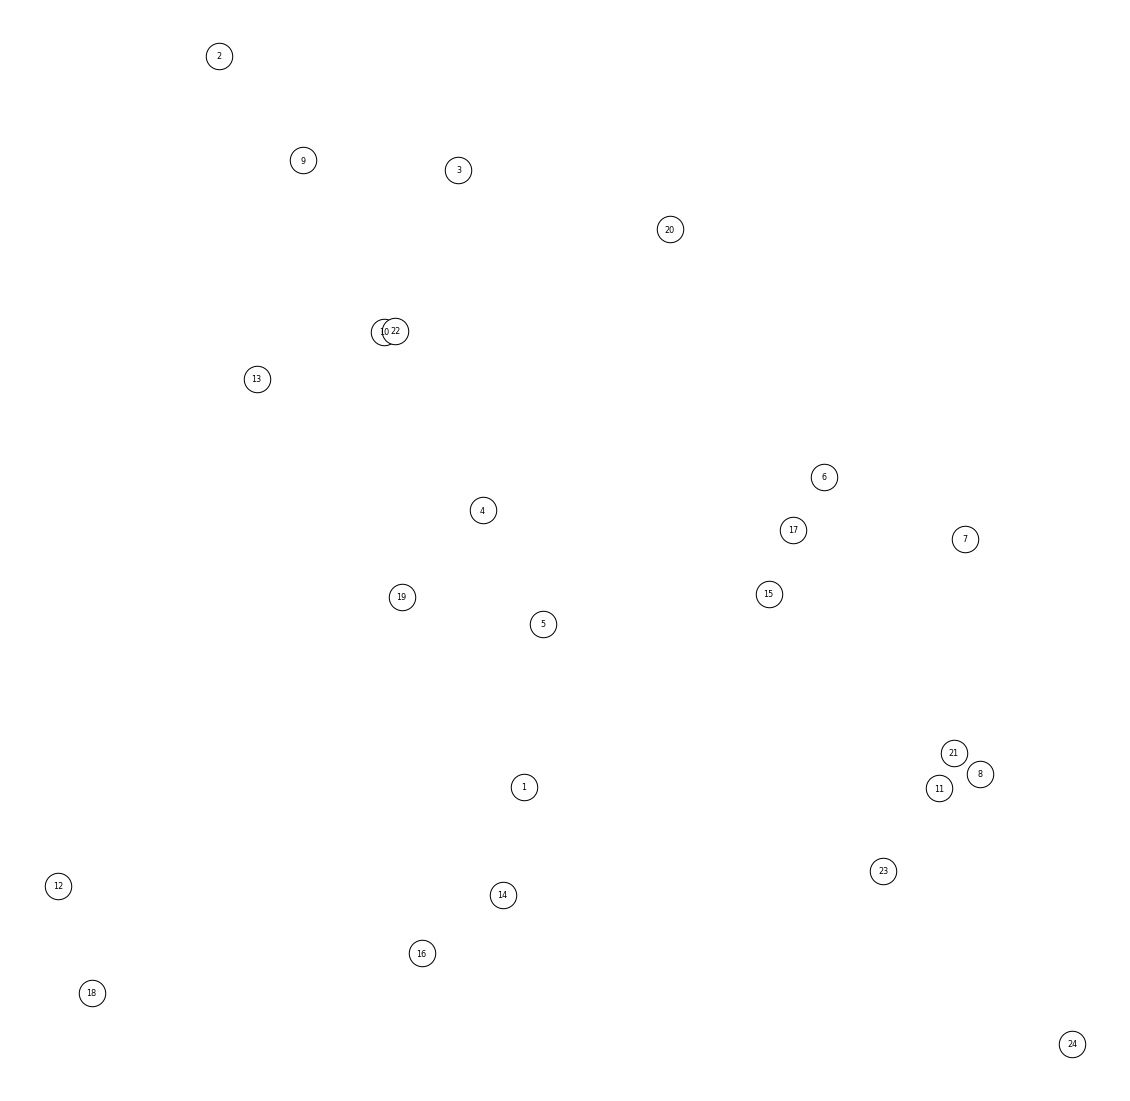

In [35]:
root = 1
number_of_product=50
DrawInitG(G)

<p>The $d_{k}$ are saved in external file respect to graph file, but they are recognizable because they have same file name but different extension</p>

In [36]:
d = np.loadtxt('./Examples/Demand/TPP_FSO_CapEuclideo_50_50_1.csv', delimiter=',')

because I've reduces Graph and for now i just want to test if it works, then I'll set the values by hand (but ideally one load the one from files). I'll set the $d_{k}$ equals to the sum of $q_{ik}$ minus a random value with range between 0 and mean($d_{k}$)/2 (in order to make it the more realistic possible; mean($d_{k}$)/2 in order to modify good part of $d$ avoiding the generation negative values)

In [37]:
d = np.zeros((number_of_product), dtype="float32")
for i in range(1, G.number_of_nodes()+1):
    availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
    for k in range(0, number_of_product):
        d[k] += availability_for_market[k]
mean_d_k = np.round(np.mean(d))
for k, element in enumerate(d):
    if element >= mean_d_k:
        d[k] = d[k] - np.random.randint(mean_d_k+1, size=1)[0]
d

array([  7.,  44.,  54.,  37.,   2.,  11., 166.,   1., 138.,   7.,  38.,
       119.,  72.,  56., 191.,  76.,  81.,   2.,  77.,  38.,  20.,  65.,
        92.,  55.,  38.,  71.,  37., 145.,  47.,  28.,  67.,  45.,   7.,
       151., 106., 153.,  73.,  65., 116.,  61., 132., 147., 102.,  63.,
        55.,  90., 101., 105.,  98., 115.], dtype=float32)

In [38]:
print(d)

[  7.  44.  54.  37.   2.  11. 166.   1. 138.   7.  38. 119.  72.  56.
 191.  76.  81.   2.  77.  38.  20.  65.  92.  55.  38.  71.  37. 145.
  47.  28.  67.  45.   7. 151. 106. 153.  73.  65. 116.  61. 132. 147.
 102.  63.  55.  90. 101. 105.  98. 115.]


In [39]:
with open("./Examples/Time_limits/TPP_FSO_CapEuclideo_50_50_1.txt", 'r') as f:
    limit_time = f.read()

Analoug to $d_{k}$ (note that I've subtracted something to the max value that limit_time could get in order to not get trivial solution, but in this way infesibility can arise)

In [40]:
limit_time = 0
for i,j in G.edges():
    limit_time += float(G.edges()[i, j]['distance']) - np.random.randint(np.round(float(G.edges()[i, j]['distance'])/8), size=1)[0]
limit_time

259653.0

At this point I've collected availability data from graph because it will return useful later

In [41]:
markets_availability = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # q_ik
for i in range(1, G.number_of_nodes()+1):
    availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
    for k in range(0, number_of_product):
        markets_availability[i-1,k] = availability_for_market[k]

finally I generate $hp_{ik}$, $sp'_{ik}$ and $sp''_{ik}$ starting from data stored in the nodes and adding random values analougally as made for $d_{k}$ and $D$

In [42]:
markets_fast_service_cost = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # hp_ik
markets_standard_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp'_ik
markets_fast_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp''_ik
for i in range(1, G.number_of_nodes()+1):
    if i == 1:
        continue
    starting_fast_service_cost = float(G.nodes()[i]['fast_cost'])
    starting_standard_service_time = float(G.nodes()[i]['standard_time'])
    starting_fast_service_time = float(G.nodes()[i]['fast_time'])
    for k in range(0, number_of_product):
        markets_fast_service_cost[i-1, k] = starting_fast_service_cost - np.random.randint(np.round((starting_fast_service_cost/8))+1, size=1)[0]
        markets_standard_service_time[i-1, k] = starting_standard_service_time - np.random.randint(np.round(starting_standard_service_time/8)+1, size=1)[0]
        markets_fast_service_time[i-1, k] = starting_fast_service_time - np.random.randint(np.round(starting_fast_service_time/8)+1, size=1)[0]

### Gurobi model definition - variables and objective function

In [43]:
atpp_fso = gb.Model()
x = atpp_fso.addVars(G.edges(), obj=[float(G[i][j]['distance']) for i,j in G.edges()], vtype=gb.GRB.BINARY, name='x')
o = atpp_fso.addVars(G.nodes(),vtype=gb.GRB.BINARY, name='o')
r = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="r")
y = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.BINARY, name="y")
op = atpp_fso.addVars(G.nodes(), obj=1.0, vtype=gb.GRB.CONTINUOUS, lb=0.0, name="op")
sp = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="sp")
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

I've created the variable z by creating the entry of gurobidict one by one because otherwise it give to me "Assertion error" without specifying the reasons (I've tried several solution and also search in gurobi documentation but only this solution works)

In [44]:
z = {}
for i in range(1, G.number_of_nodes()+1):
    prices_for_market = np.fromstring(G.nodes()[i]['market_cost'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
    for k in range(0, number_of_product):
        z[i,k] = atpp_fso.addVar(obj=prices_for_market[k], lb=0.0, vtype=gb.GRB.CONTINUOUS, name="z[" + str(i) + "," + str(k) + "]")
atpp_fso.write('./Lp_files/atpp_fso_1.lp')
z = gb.tupledict(z)   #convert z to tupledict object (which is the type redurned from addVars)

### Gurobi constraint definition

In [45]:
atpp_fso.addConstrs((x.sum(i,'*') == y[i] for i in G.nodes()), name='1')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [46]:
atpp_fso.addConstrs((x.sum('*', i) == y[i] for i in G.nodes()), name='2')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [47]:
atpp_fso.addConstr((gb.quicksum(x[i, j] for i, j in G.edges() if i == 1 and i != j) == 1), name='3')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [48]:
atpp_fso.addConstr((gb.quicksum(x[i, j] for i, j in G.edges() if j == 1 and i != j) == 1), name='4')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [49]:
atpp_fso.addConstrs((z.sum('*', k) == d[k] for k in range(0, number_of_product)), name='5')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [50]:
atpp_fso.addConstrs((z[i, k] <= (markets_availability[i-1, k] * y[i]) for i in range(1, G.number_of_nodes()+1) for k in range(0, number_of_product)), name='6')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [51]:
atpp_fso.addConstrs((r[i] + sp[i] + 
                     (x[i, j] * float(G.edges()[i, j]['distance'])) <= 
                     r[j] + (float(limit_time) * (1 - x[i, j])) 
                     for i in G.nodes() for j in G.nodes() if i != j and i != 1 and j != 1), name="7")
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [52]:
atpp_fso.addConstrs(((x[1, j] * float(G.edges()[1, j]['distance'])) <= 
                     r[j] + (float(limit_time) * (1 - x[1, j])) 
                     for j in G.nodes() if j != 1), name="8")
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [53]:
atpp_fso.addConstrs((r[i] + sp[i] + 
                     (x[i, 1] * float(G.edges()[i, 1]['distance'])) <= 
                     r[1] + (float(limit_time) * (1 - x[i, 1])) 
                     for i in G.nodes() if i != 1), name="9")
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [54]:
r[root].ub = float(limit_time)   # constraint 10
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [55]:
atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_standard_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='11')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [56]:
atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_fast_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='12')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [57]:
atpp_fso.addConstrs((op[i] >= (gb.quicksum(markets_fast_service_cost[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (gb.quicksum(markets_fast_service_cost[i-1, k] * markets_availability[i-1, k] for k in range(0, number_of_product))) * (1 - o[i]) for i in range(1, G.number_of_nodes()+1)), name='13')
atpp_fso.update()
atpp_fso.write('./Lp_files/atpp_fso_1.lp')

In [58]:
atpp_fso.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1924 rows, 1872 columns and 9939 nonzeros
Model fingerprint: 0xf114e1e0
Variable types: 1272 continuous, 600 integer (600 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1230 rows and 787 columns
Presolve time: 0.02s
Presolved: 694 rows, 1085 columns, 5628 nonzeros
Variable types: 510 continuous, 575 integer (575 binary)

Root relaxation: objective 1.928465e+04, 226 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 19284.6504    0   51          - 19284.6504      -     -    0s
H    0     0                    88323.000000 19284.6504  78.2%     -   

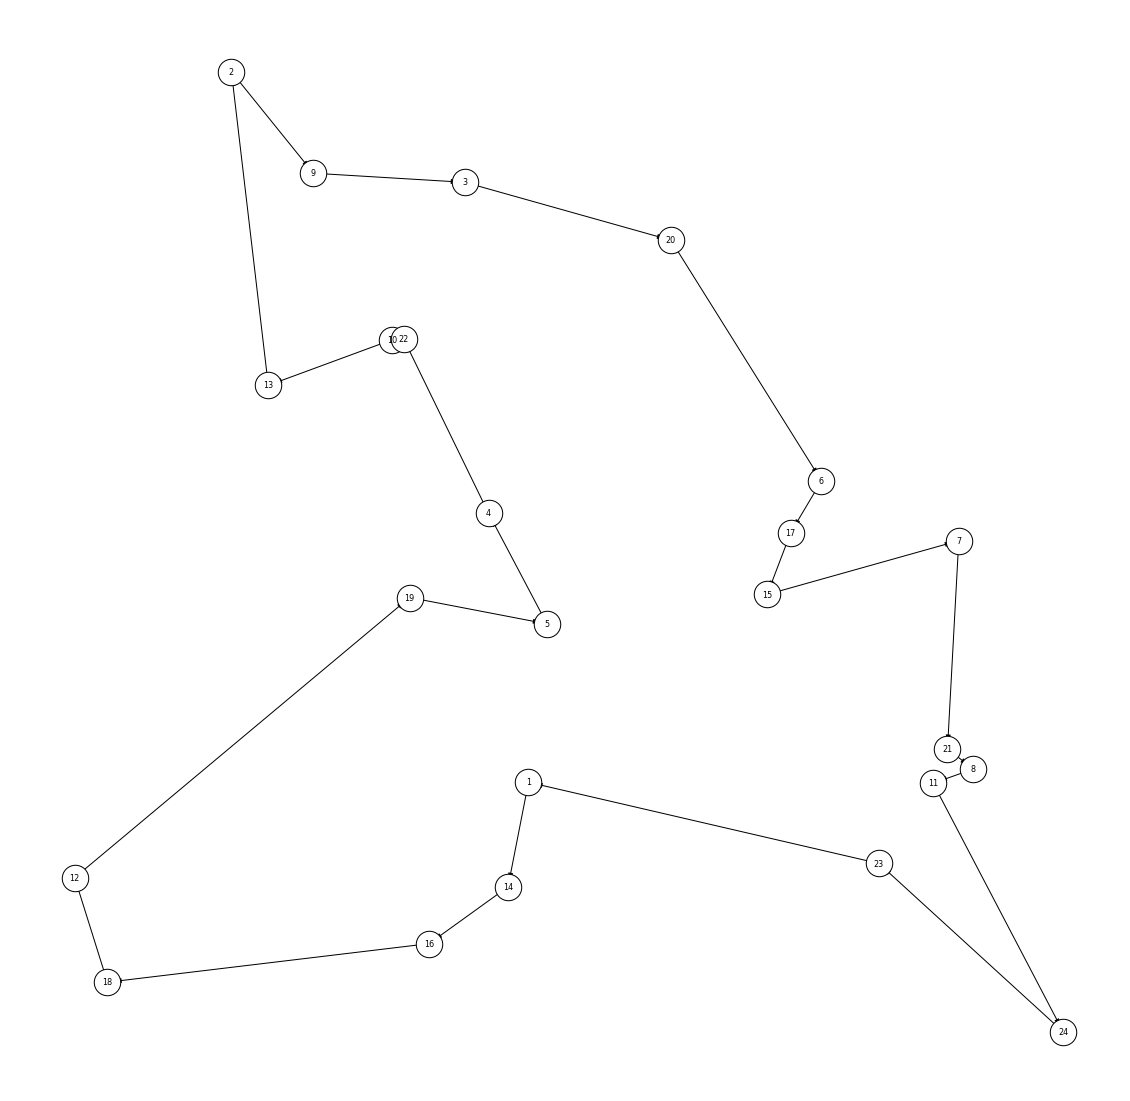

In [59]:
DrawSol(G,x)

### Experiments and considerations about complexity of the problem

I wanted to see how much the execution time of the optimization grows with the size of the problem, but as I said before, this is the maximum that I can do without academic license of Gurobi. In the following cell I've estimated the time execution of this algorithm over the samples (resized to 25 nodes, with random definition of $d$ and $D$ as before) get during data collection.

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0x738ebc24
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 990 rows and 702 columns
Presolve time: 0.02s
Presolved: 776 rows, 1023 columns, 5575 nonzeros
Variable types: 394 continuous, 629 integer (629 binary)

Root relaxation: objective 1.447783e+04, 251 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14477.8317    0   50          - 14477.8317      -     -    0s
     0     0 14587.4933    0   47          - 14587.4933      -     -    

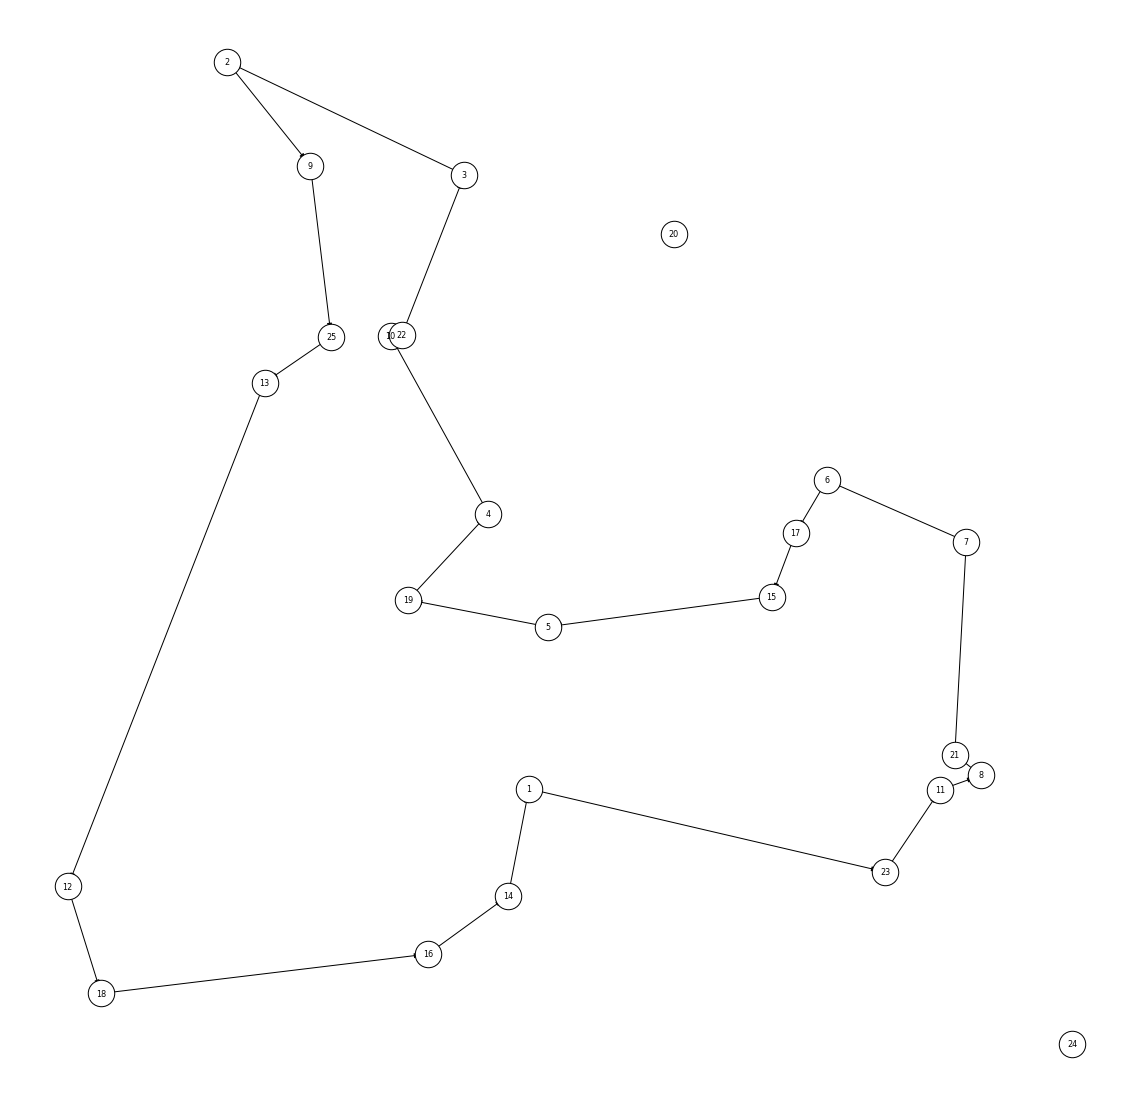

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9084 nonzeros
Model fingerprint: 0xbf1357f3
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1028 rows and 737 columns
Presolve time: 0.02s
Presolved: 738 rows, 988 columns, 5377 nonzeros
Variable types: 364 continuous, 624 integer (624 binary)

Root relaxation: objective 1.599441e+04, 206 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15994.4128    0   62          - 15994.4128      -     -    0s
     0     0 16149.7509    0   50          - 16149.7509      -     -    

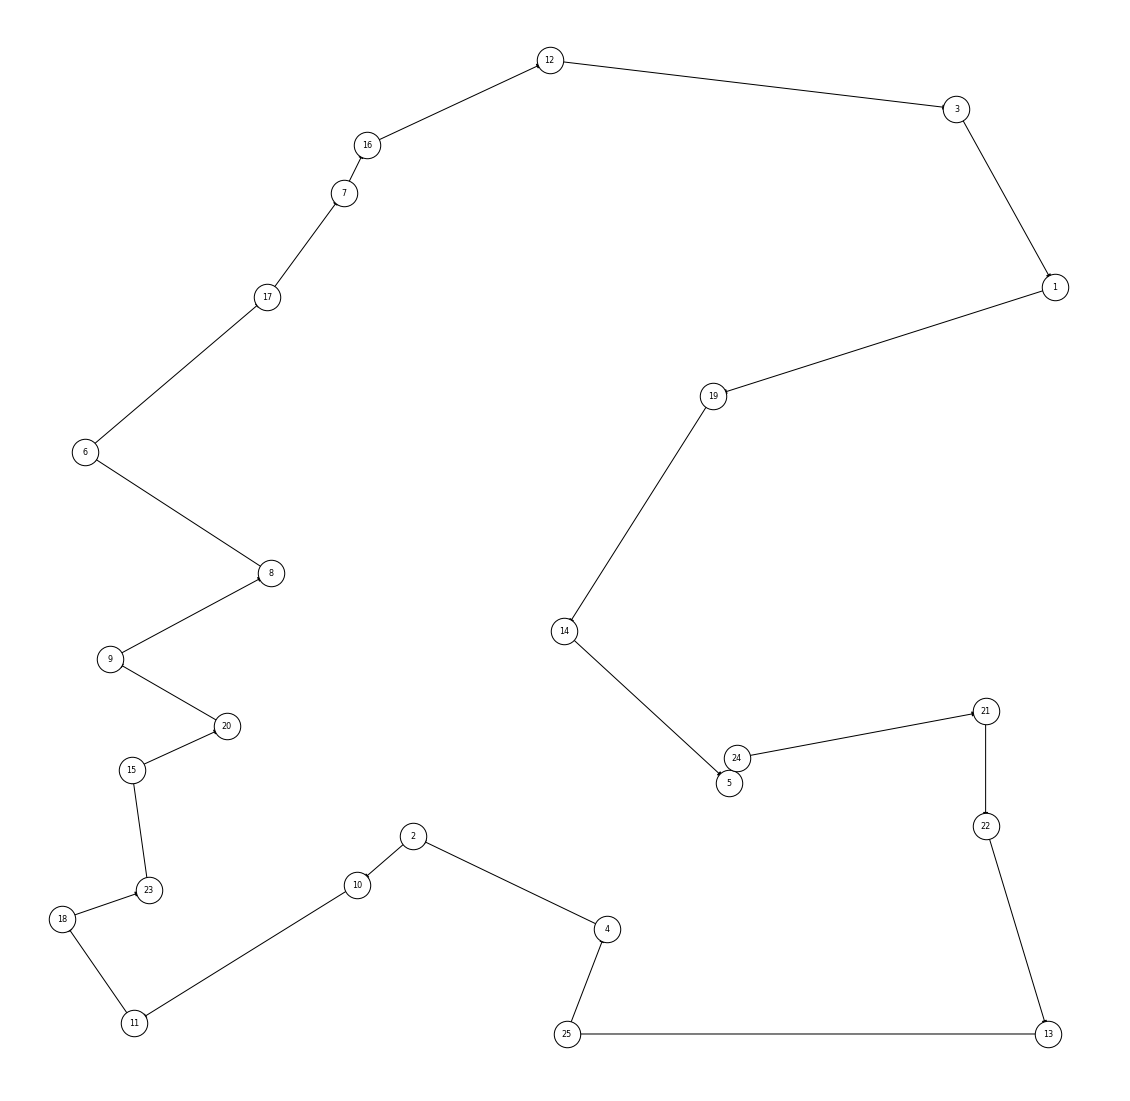

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0x39598e10
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 989 rows and 703 columns
Presolve time: 0.03s
Presolved: 777 rows, 1022 columns, 5574 nonzeros
Variable types: 394 continuous, 628 integer (628 binary)

Root relaxation: objective 1.498139e+04, 281 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14981.3927    0   56          - 14981.3927      -     -    0s
H    0     0                    59288.000000 15375.2581  74.1%     -    

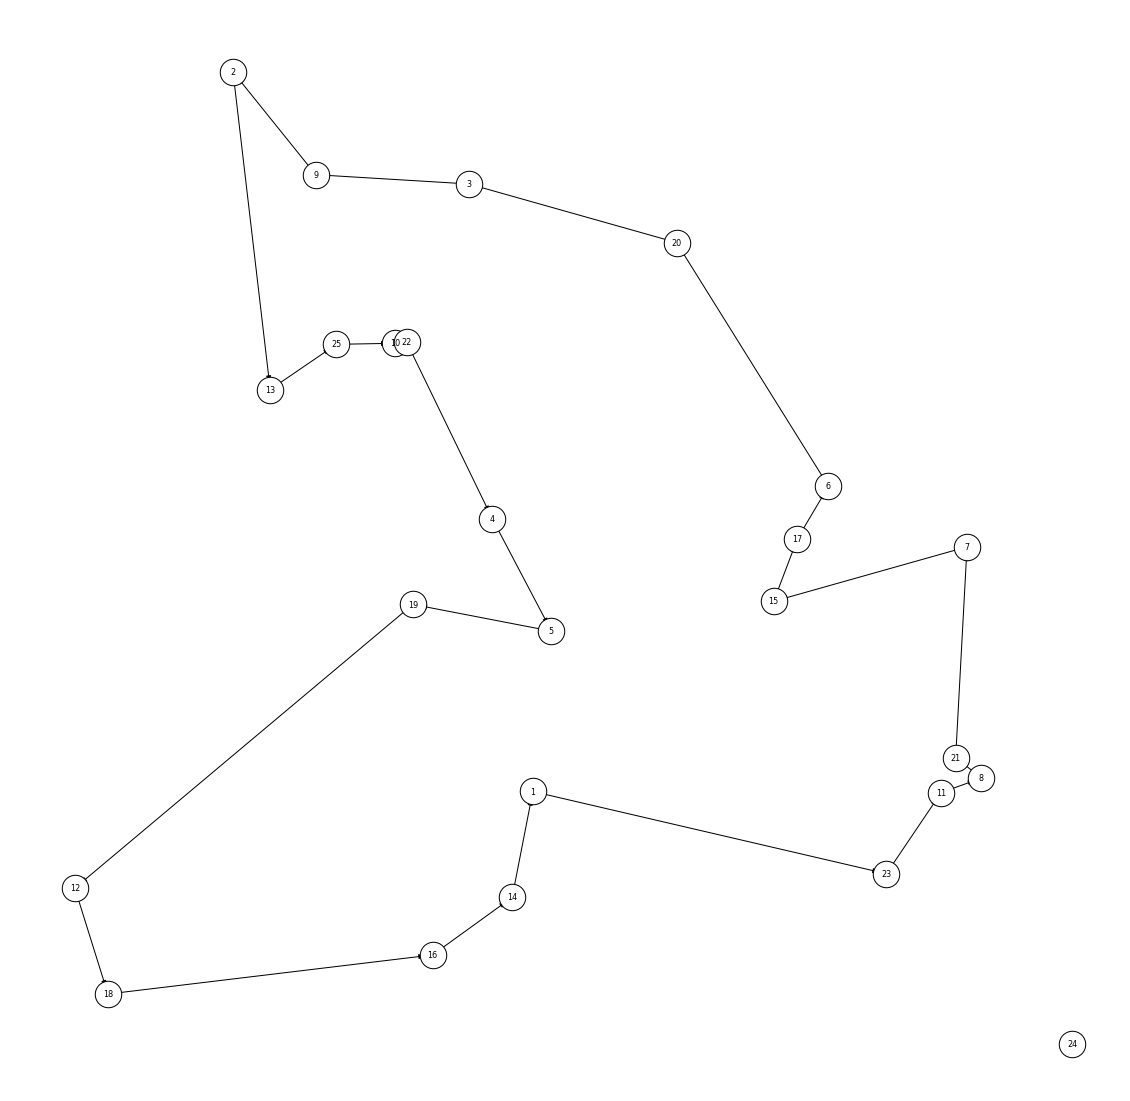

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9186 nonzeros
Model fingerprint: 0x6a2d6a59
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1022 rows and 606 columns
Presolve time: 0.02s
Presolved: 744 rows, 1119 columns, 5892 nonzeros
Variable types: 495 continuous, 624 integer (624 binary)

Root relaxation: objective 1.684400e+04, 259 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16844.0037    0   58          - 16844.0037      -     -    0s
     0     0 17165.9475    0   45          - 17165.9475      -     -   

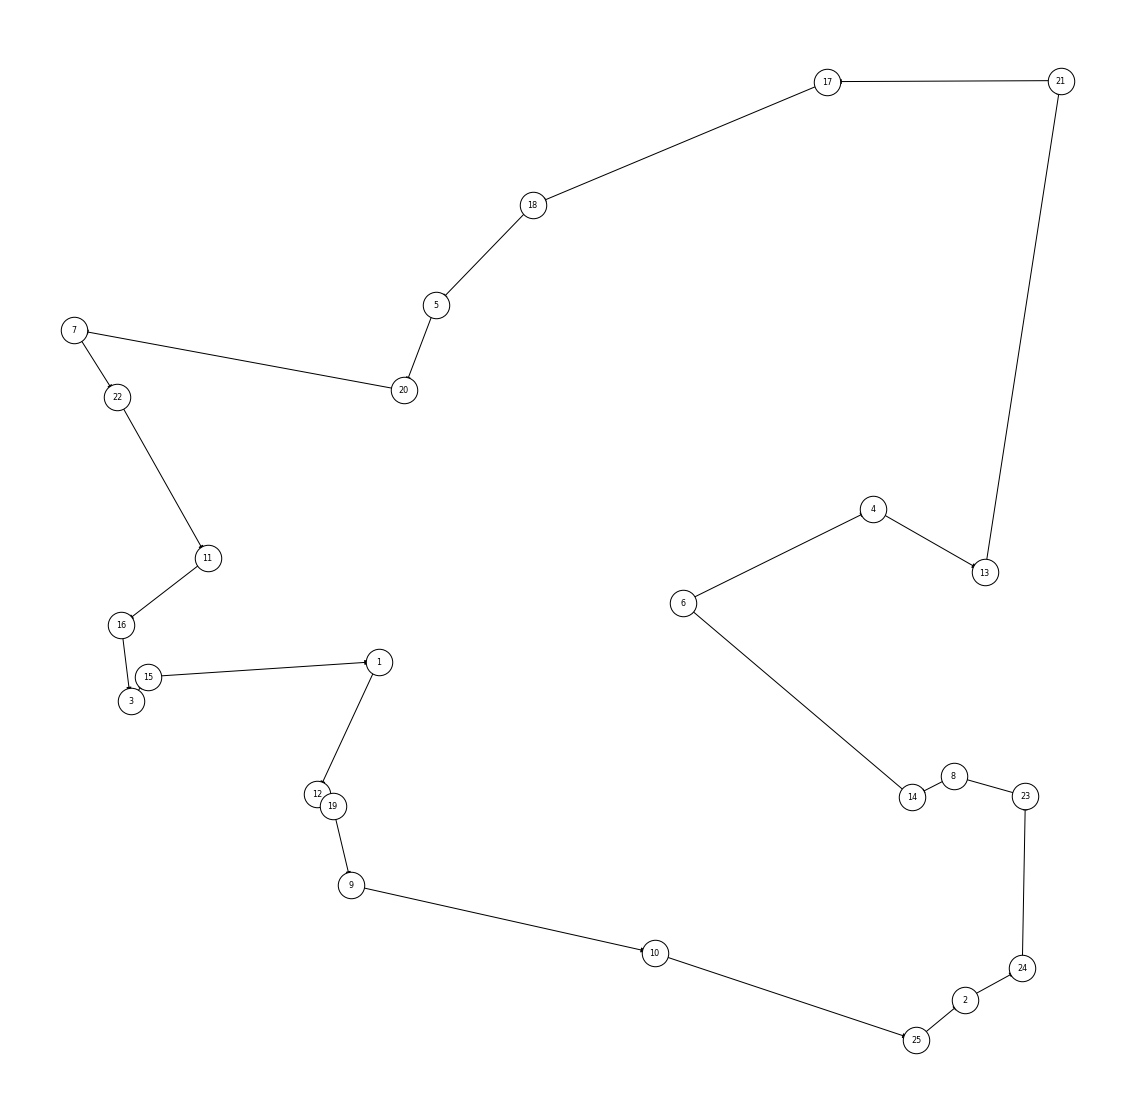

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9064 nonzeros
Model fingerprint: 0x0bf840f2
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1027 rows and 747 columns
Presolve time: 0.02s
Presolved: 739 rows, 978 columns, 5328 nonzeros
Variable types: 354 continuous, 624 integer (624 binary)

Root relaxation: objective 1.315366e+04, 216 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13153.6621    0   69          - 13153.6621      -     -    0s
     0     0 13564.6855    0   51          - 13564.6855      -     -    

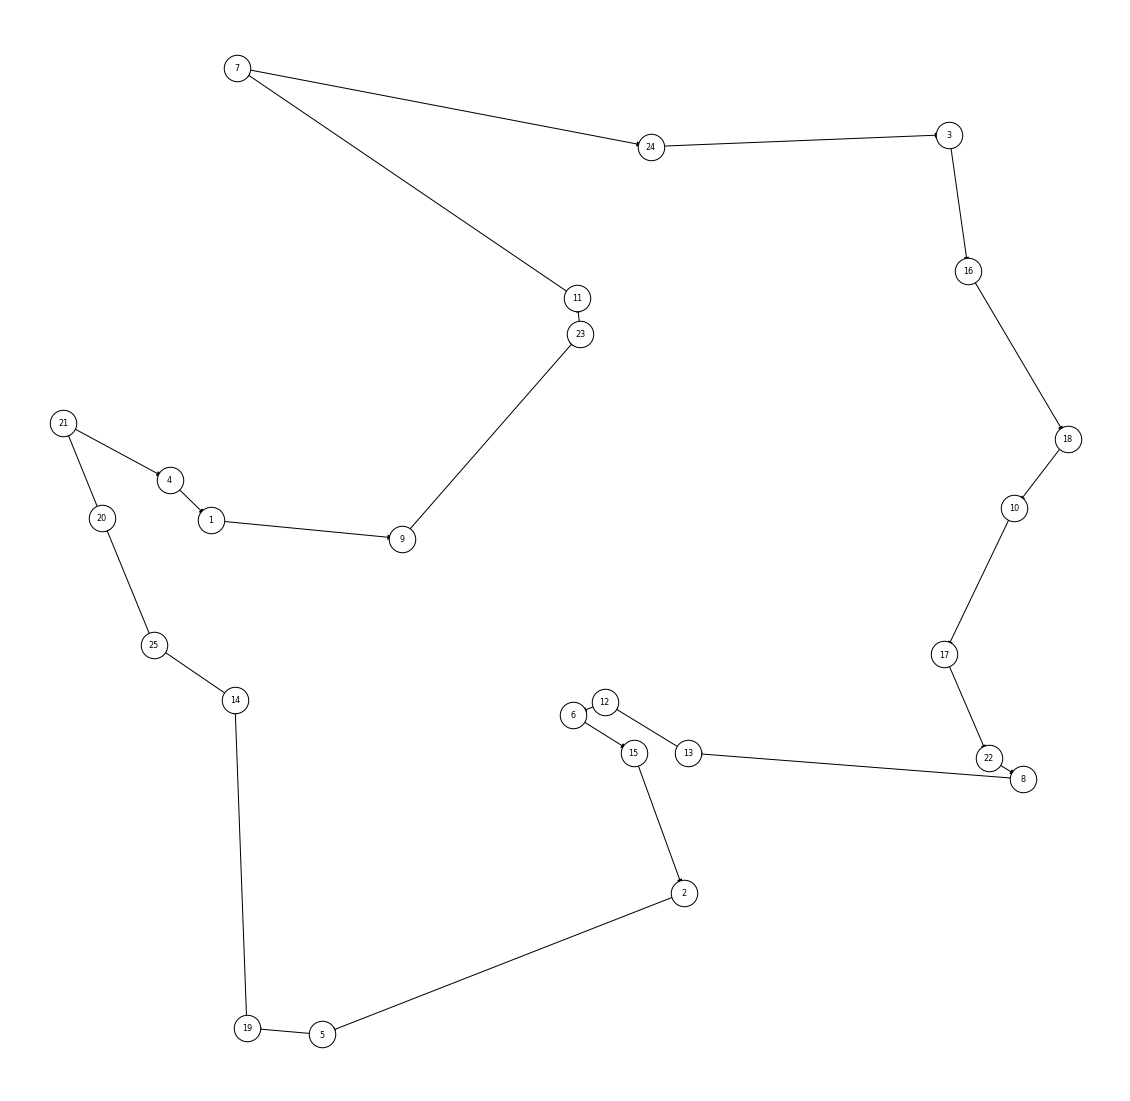

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0x56efa812
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1027 rows and 710 columns
Presolve time: 0.03s
Presolved: 739 rows, 1015 columns, 5476 nonzeros
Variable types: 391 continuous, 624 integer (624 binary)

Root relaxation: objective 1.808199e+04, 277 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 18081.9898    0   43          - 18081.9898      -     -    0s
H    0     0                    32309.000000 18081.9898  44.0%     -   

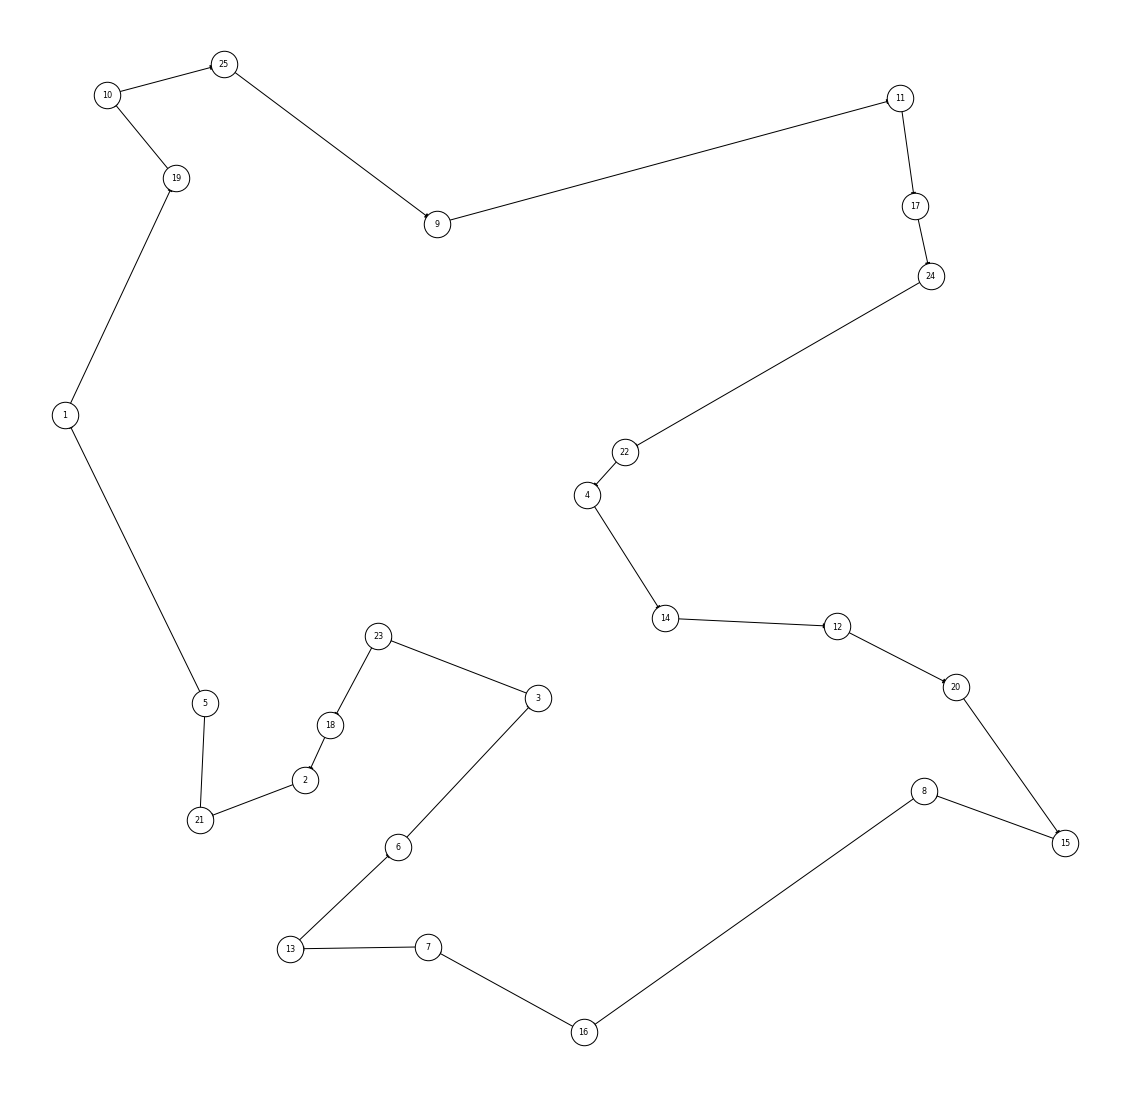

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9083 nonzeros
Model fingerprint: 0xb2f69abb
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1027 rows and 739 columns
Presolve time: 0.02s
Presolved: 739 rows, 986 columns, 5360 nonzeros
Variable types: 362 continuous, 624 integer (624 binary)

Root relaxation: objective 1.638994e+04, 228 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16389.9446    0   61          - 16389.9446      -     -    0s
     0     0 16628.9621    0   44          - 16628.9621      -     -    

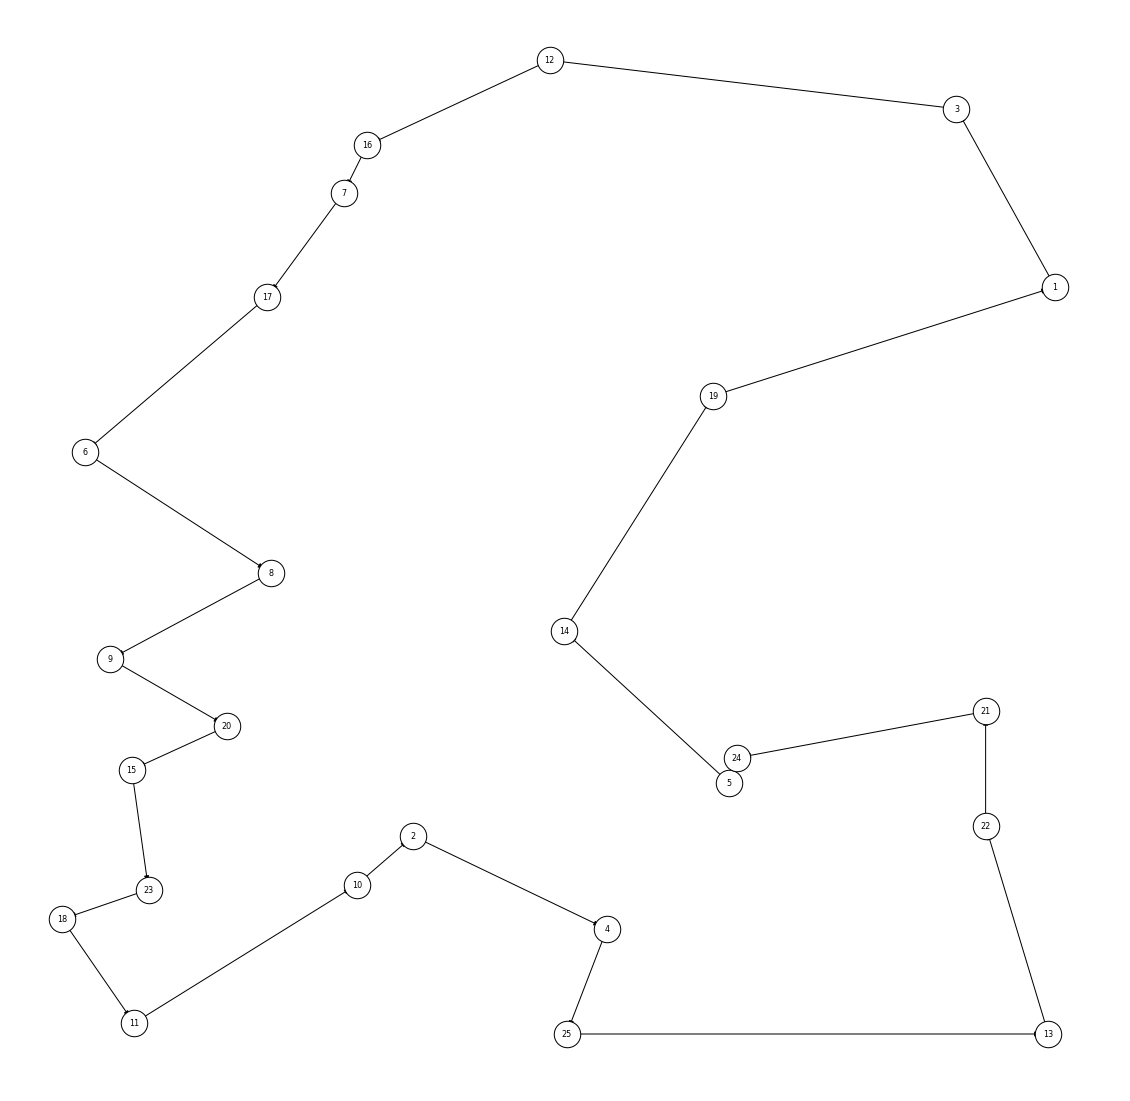

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9110 nonzeros
Model fingerprint: 0x60f1f953
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1025 rows and 685 columns
Presolve time: 0.03s
Presolved: 741 rows, 1040 columns, 5576 nonzeros
Variable types: 416 continuous, 624 integer (624 binary)

Root relaxation: objective 1.442072e+04, 216 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14420.7225    0   65          - 14420.7225      -     -    0s
     0     0 14816.8714    0   41          - 14816.8714      -     -   

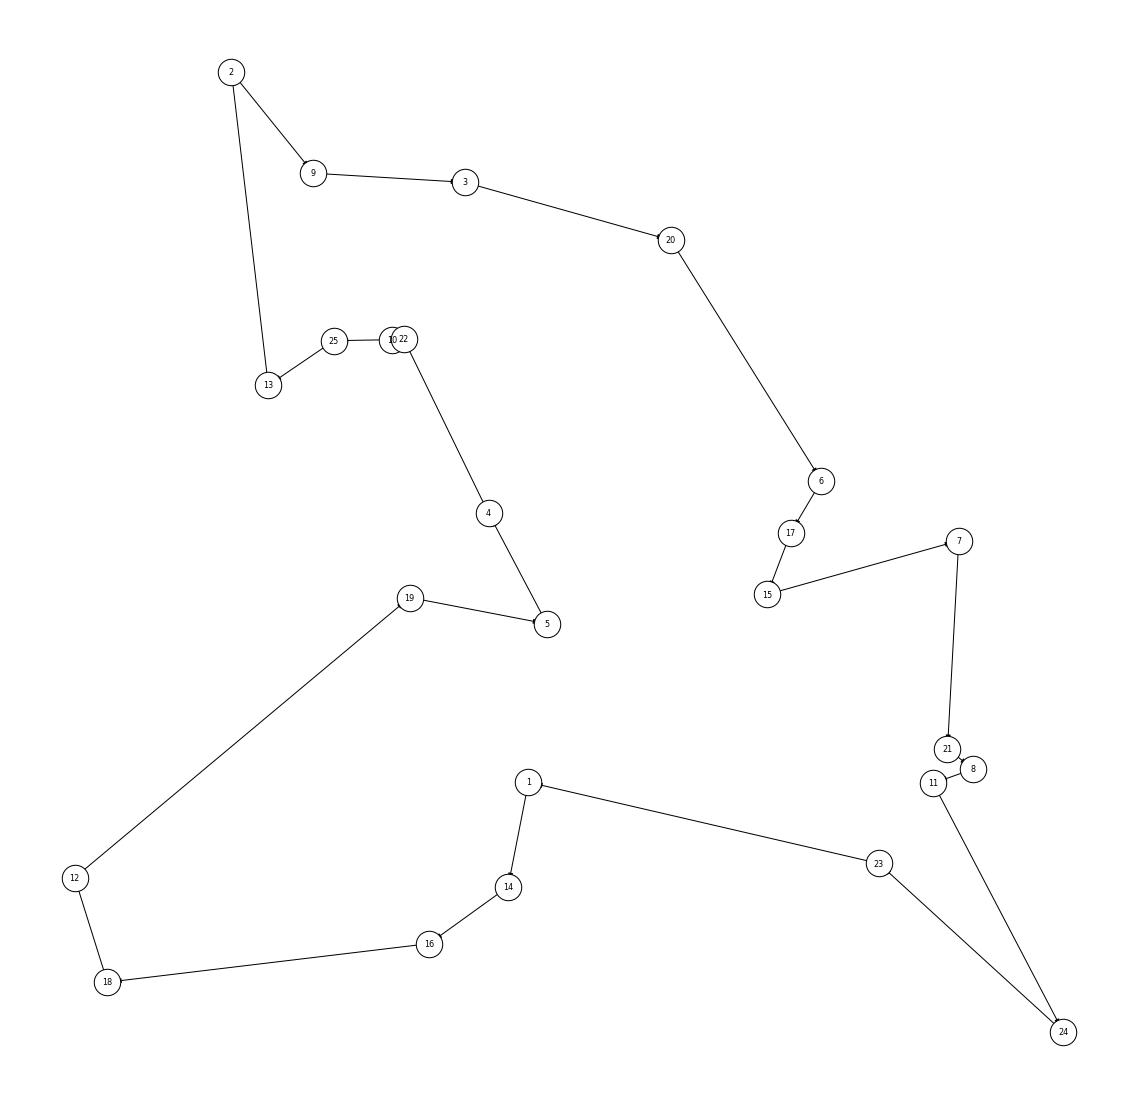

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9186 nonzeros
Model fingerprint: 0x7616934e
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1022 rows and 606 columns
Presolve time: 0.03s
Presolved: 744 rows, 1119 columns, 5892 nonzeros
Variable types: 495 continuous, 624 integer (624 binary)

Root relaxation: objective 1.620812e+04, 251 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16208.1196    0   61          - 16208.1196      -     -    0s
     0     0 16531.2346    0   46          - 16531.2346      -     -   

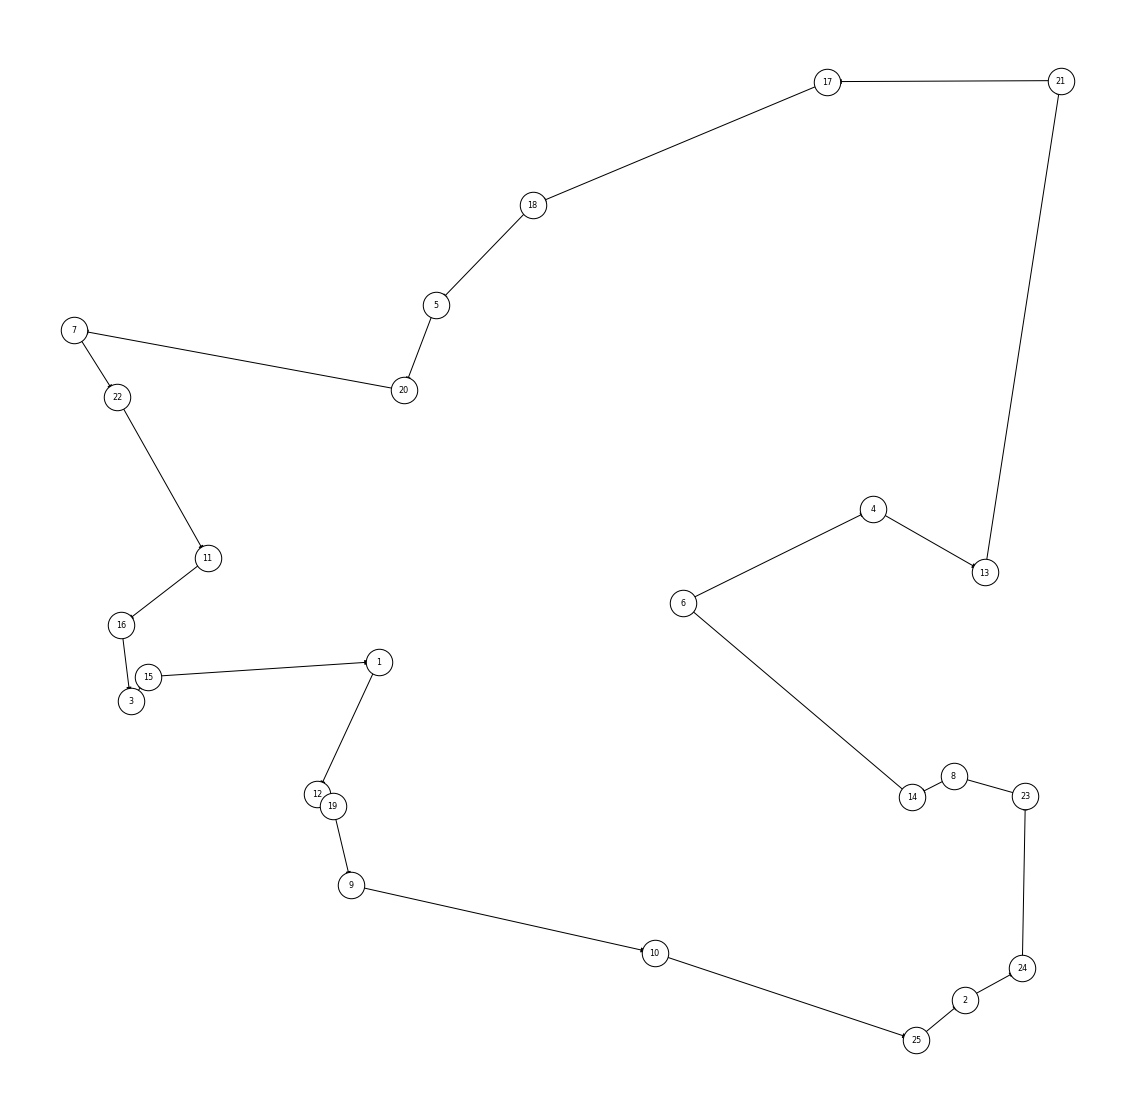

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9064 nonzeros
Model fingerprint: 0xfc9a8036
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 725 columns
Presolve time: 0.02s
Presolved: 740 rows, 1000 columns, 5416 nonzeros
Variable types: 376 continuous, 624 integer (624 binary)

Root relaxation: objective 1.420542e+04, 251 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14205.4190    0   74          - 14205.4190      -     -    0s
     0     0 14617.1166    0   50          - 14617.1166      -     -   

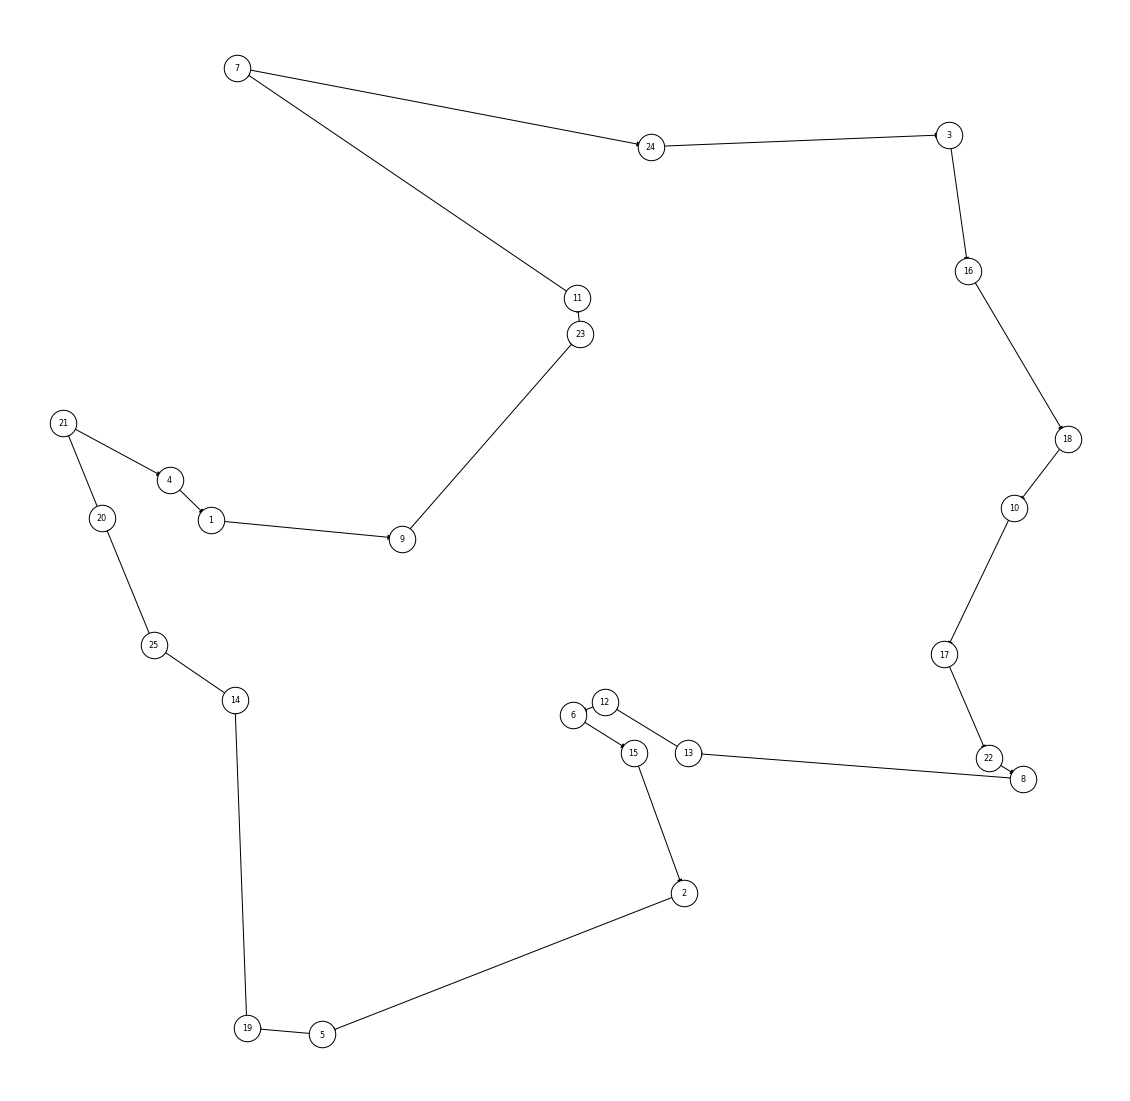

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0x5ae0f734
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1027 rows and 710 columns
Presolve time: 0.03s
Presolved: 739 rows, 1015 columns, 5476 nonzeros
Variable types: 391 continuous, 624 integer (624 binary)

Root relaxation: objective 1.612300e+04, 231 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16122.9980    0   43          - 16122.9980      -     -    0s
H    0     0                    27447.000000 16122.9980  41.3%     -   

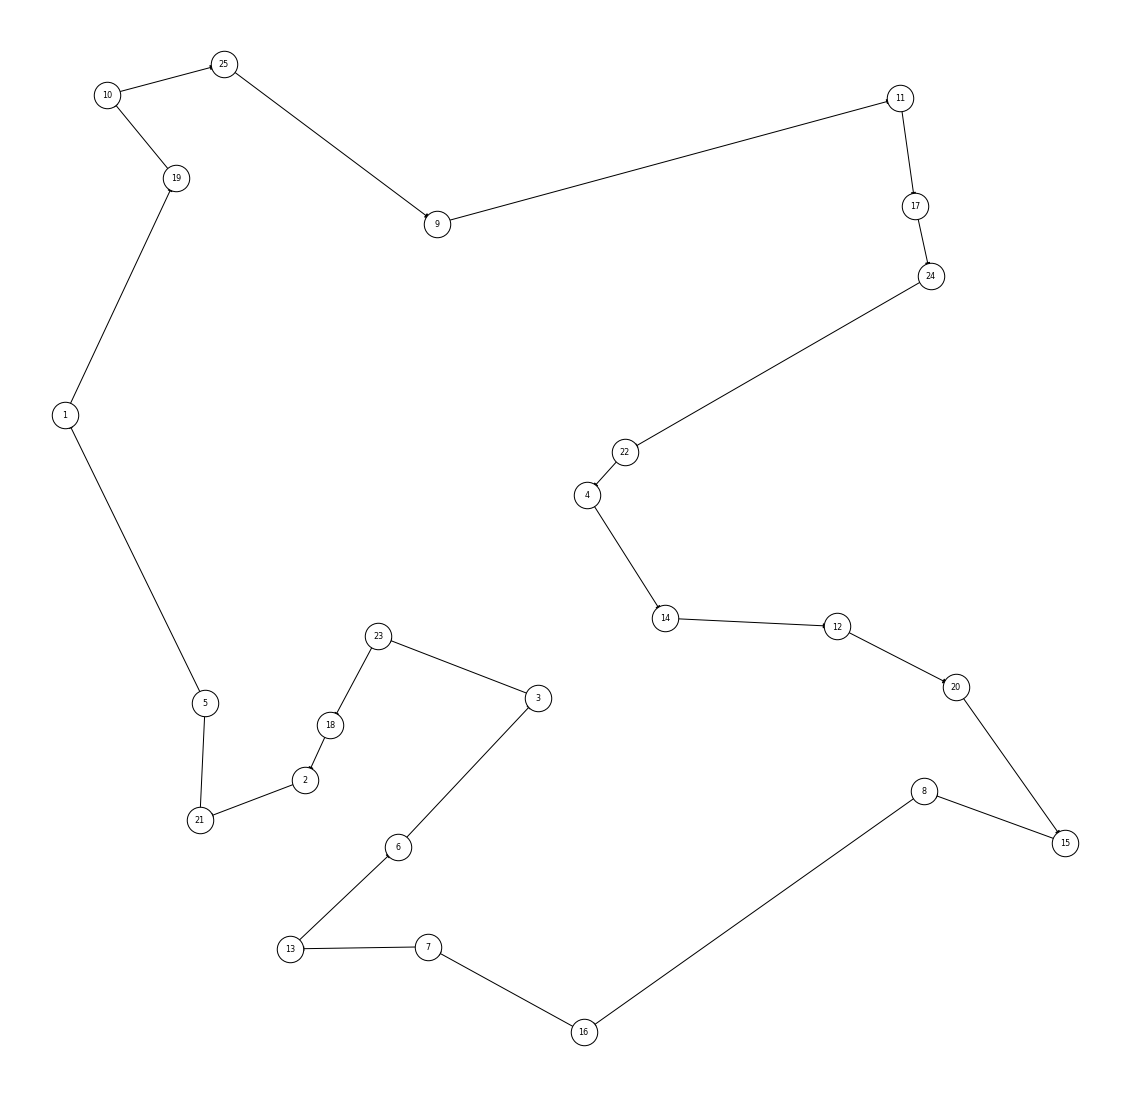

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9177 nonzeros
Model fingerprint: 0x5c1513fb
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 922 rows and 572 columns
Presolve time: 0.03s
Presolved: 844 rows, 1153 columns, 6216 nonzeros
Variable types: 521 continuous, 632 integer (632 binary)

Root relaxation: objective 1.417883e+04, 313 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14178.8253    0   65          - 14178.8253      -     -    0s
     0     0 14293.7922    0   54          - 14293.7922      -     -    

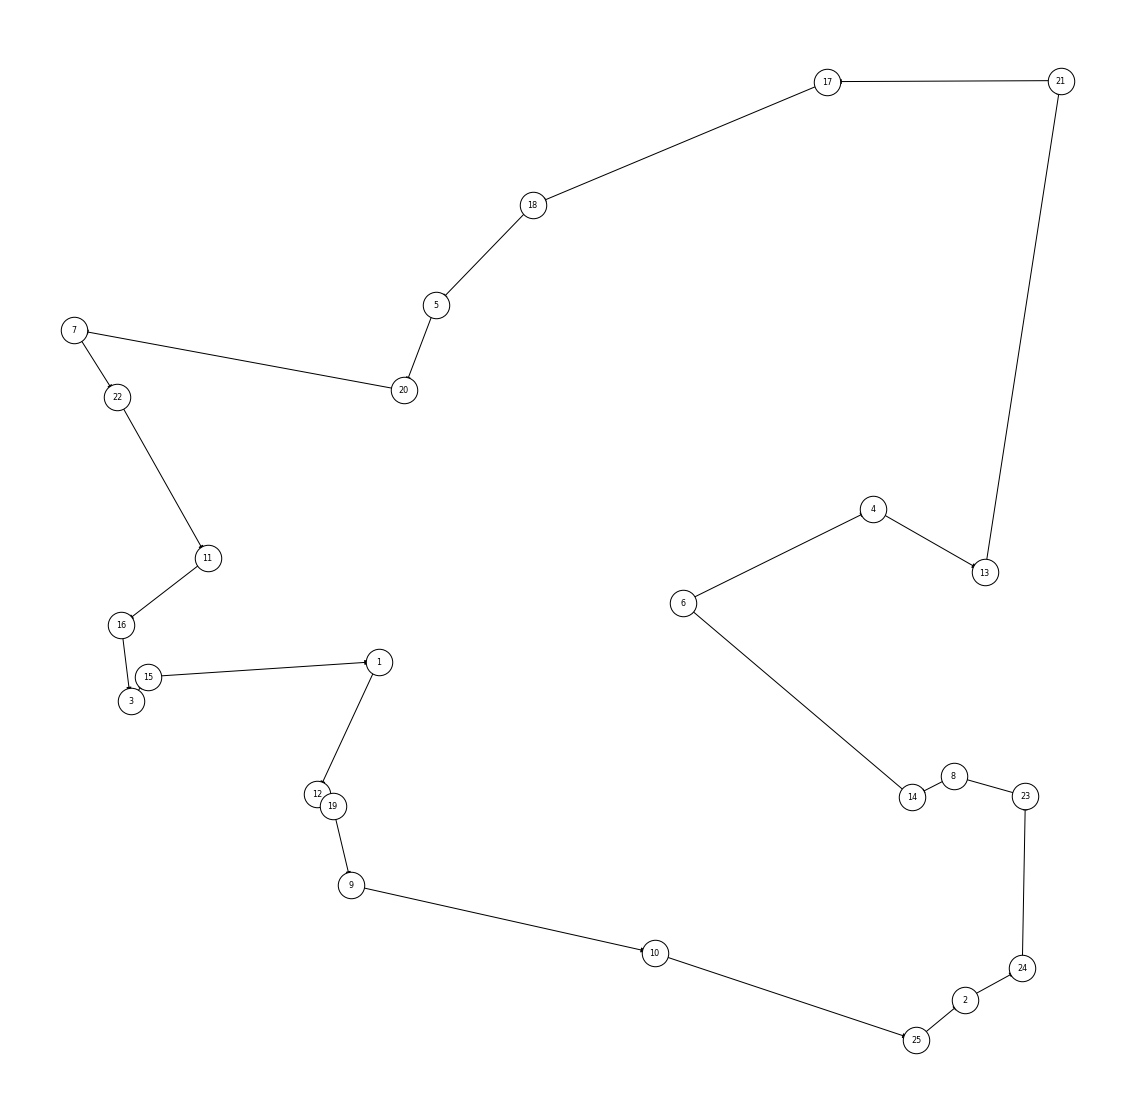

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9083 nonzeros
Model fingerprint: 0x3aa97ef5
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 719 columns
Presolve time: 0.03s
Presolved: 740 rows, 1006 columns, 5440 nonzeros
Variable types: 382 continuous, 624 integer (624 binary)

Root relaxation: objective 1.462890e+04, 237 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14628.9042    0   62          - 14628.9042      -     -    0s
     0     0 14727.1150    0   49          - 14727.1150      -     -   

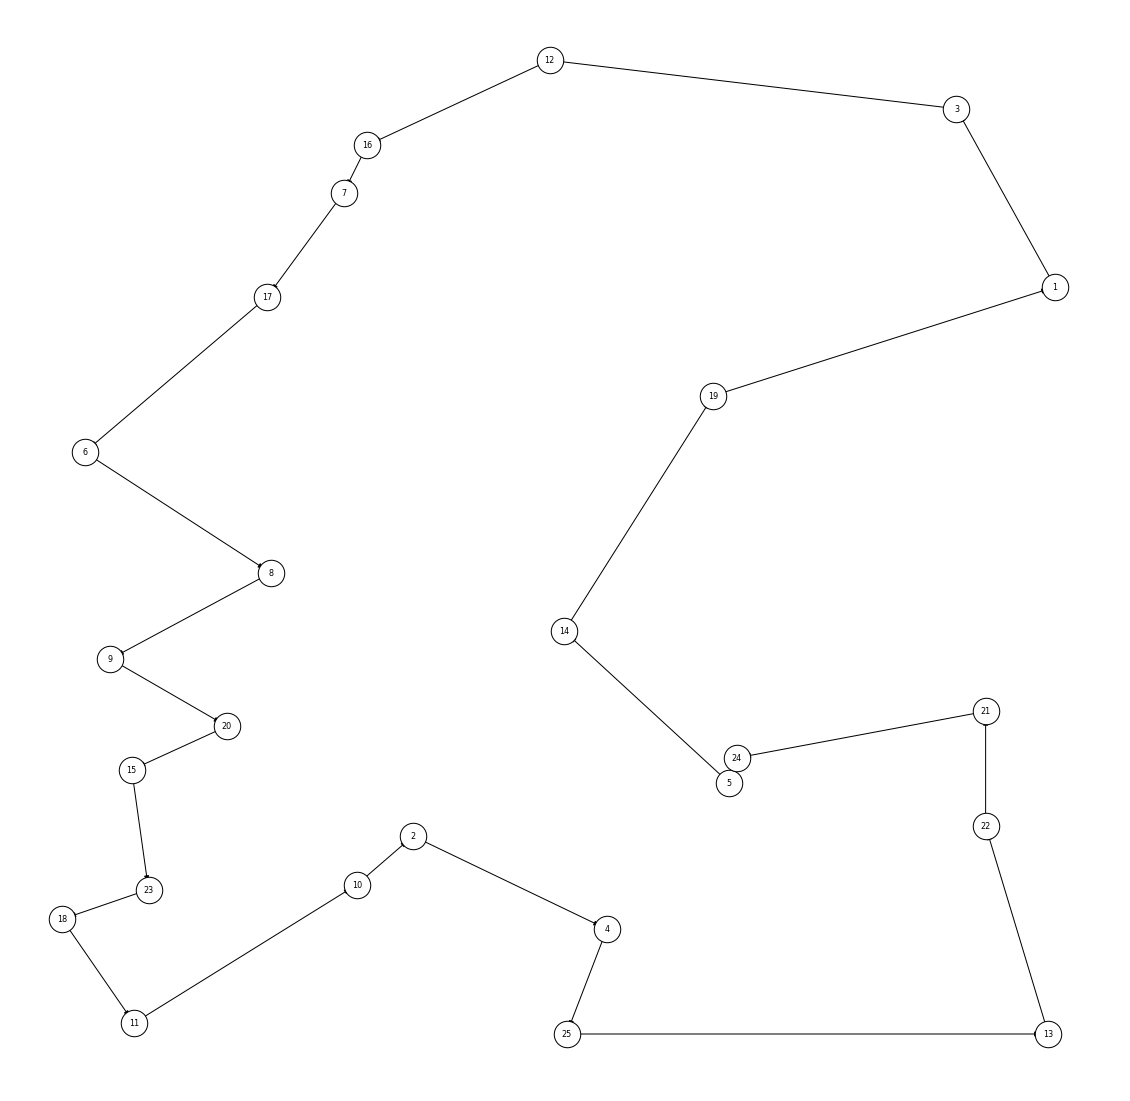

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9110 nonzeros
Model fingerprint: 0xdaabf1ec
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 707 columns
Presolve time: 0.02s
Presolved: 740 rows, 1018 columns, 5488 nonzeros
Variable types: 394 continuous, 624 integer (624 binary)

Root relaxation: objective 1.391947e+04, 233 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13919.4676    0   71          - 13919.4676      -     -    0s
     0     0 13988.7188    0   52          - 13988.7188      -     -   

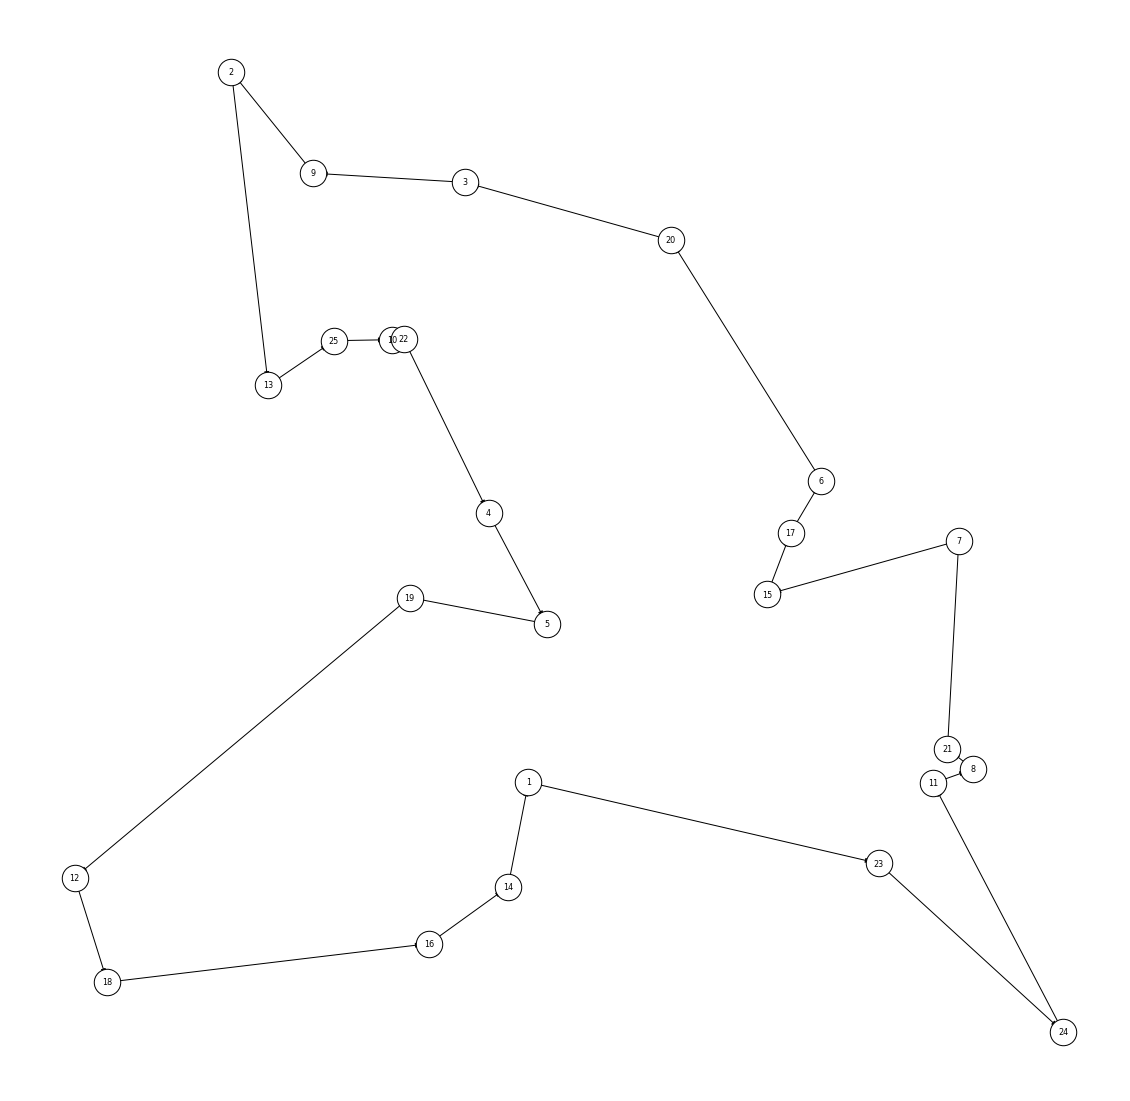

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9186 nonzeros
Model fingerprint: 0x06636d0c
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1022 rows and 606 columns
Presolve time: 0.03s
Presolved: 744 rows, 1119 columns, 5892 nonzeros
Variable types: 495 continuous, 624 integer (624 binary)

Root relaxation: objective 1.465864e+04, 269 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14658.6439    0   61          - 14658.6439      -     -    0s
     0     0 14821.3120    0   46          - 14821.3120      -     -   

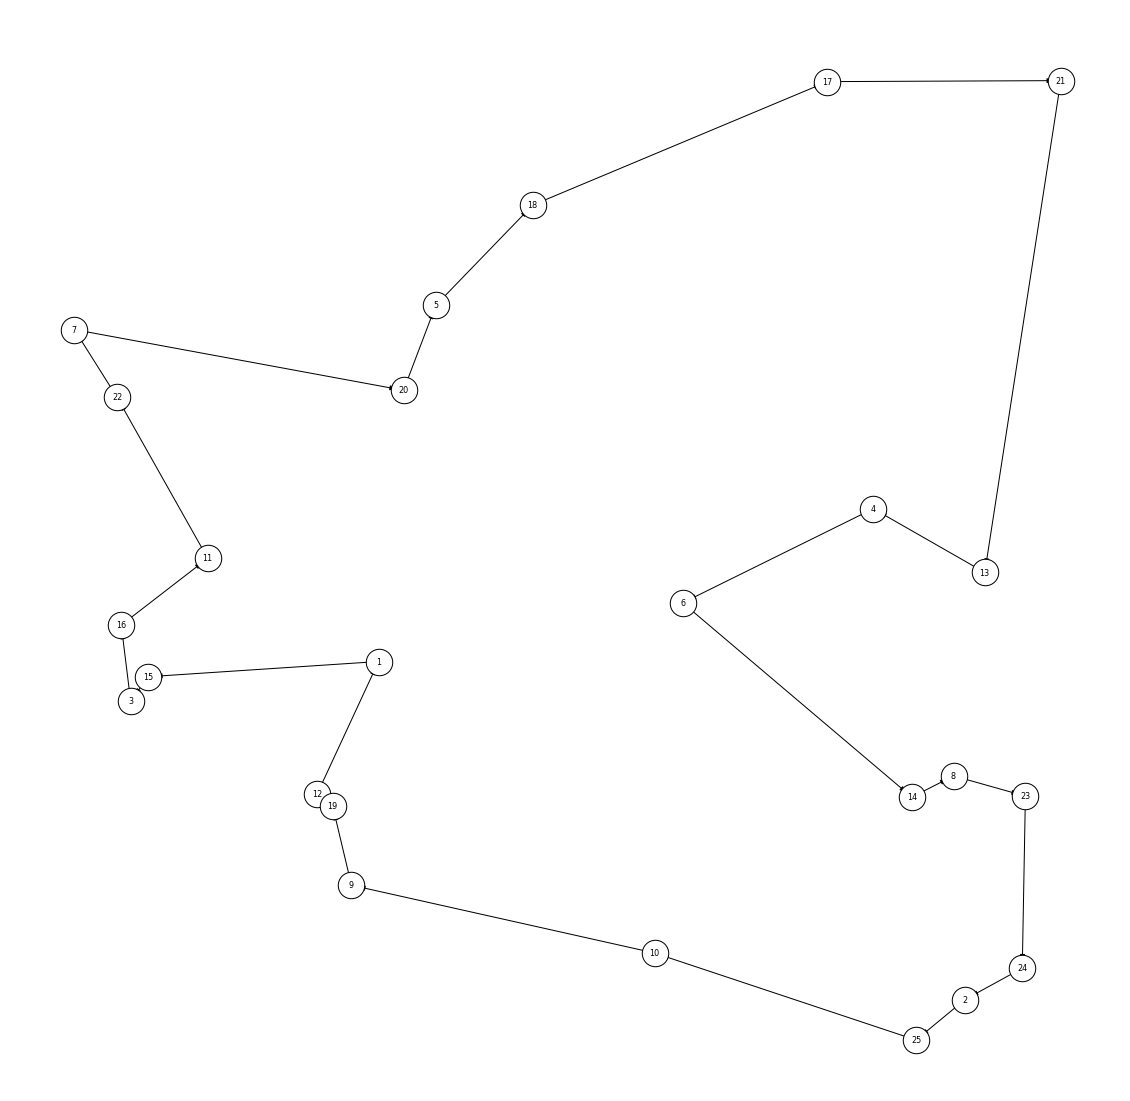

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9064 nonzeros
Model fingerprint: 0x18916cf7
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 725 columns
Presolve time: 0.03s
Presolved: 740 rows, 1000 columns, 5416 nonzeros
Variable types: 376 continuous, 624 integer (624 binary)

Root relaxation: objective 1.370627e+04, 215 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13706.2741    0   72          - 13706.2741      -     -    0s
     0     0 13885.4760    0   57          - 13885.4760      -     -   

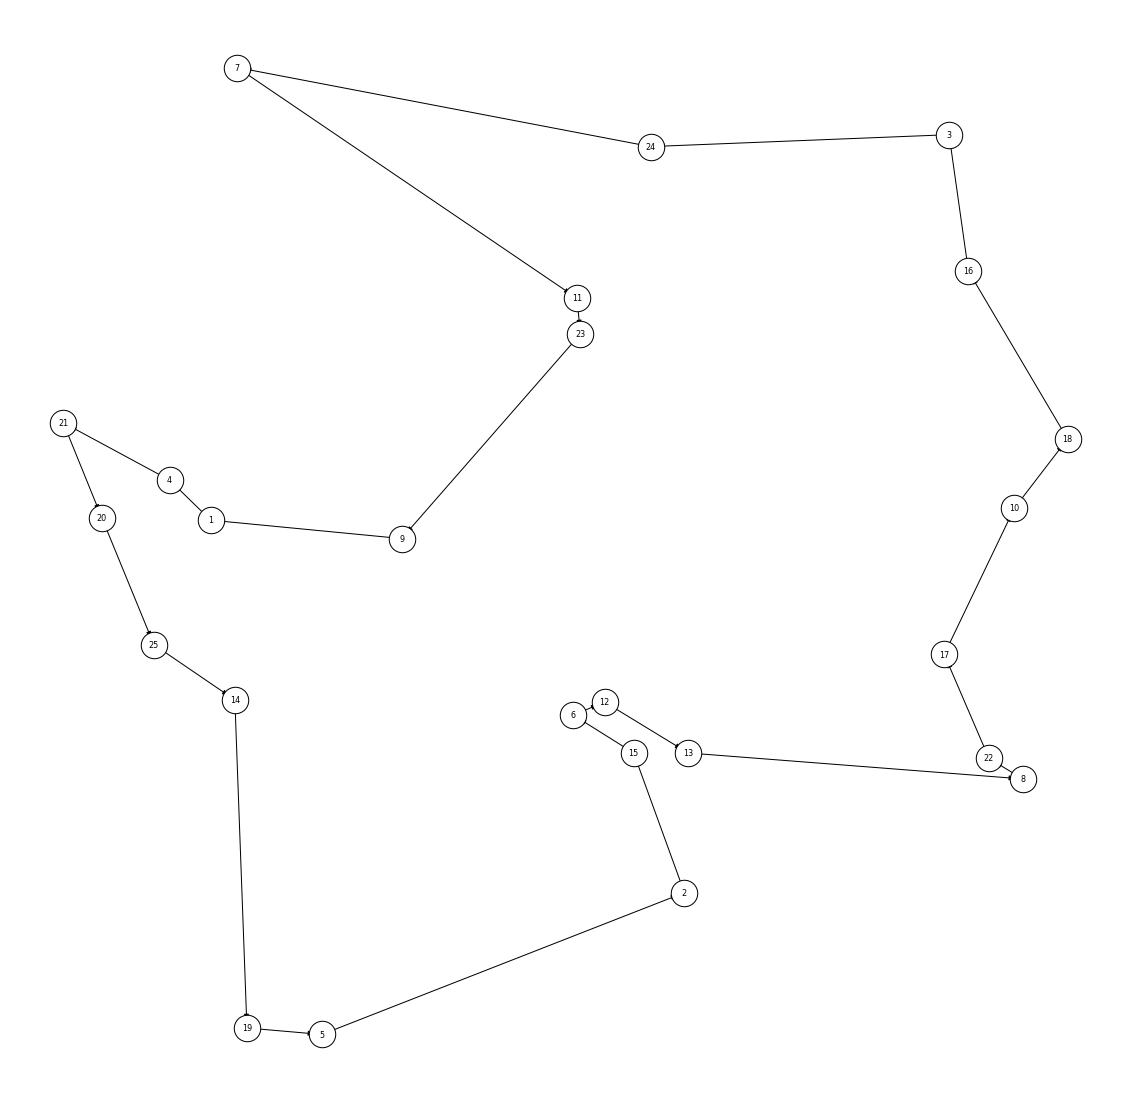

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0xdaa2d9b5
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1027 rows and 710 columns
Presolve time: 0.02s
Presolved: 739 rows, 1015 columns, 5476 nonzeros
Variable types: 391 continuous, 624 integer (624 binary)

Root relaxation: objective 1.716548e+04, 237 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 17165.4809    0   40          - 17165.4809      -     -    0s
H    0     0                    27047.000000 17165.4809  36.5%     -   

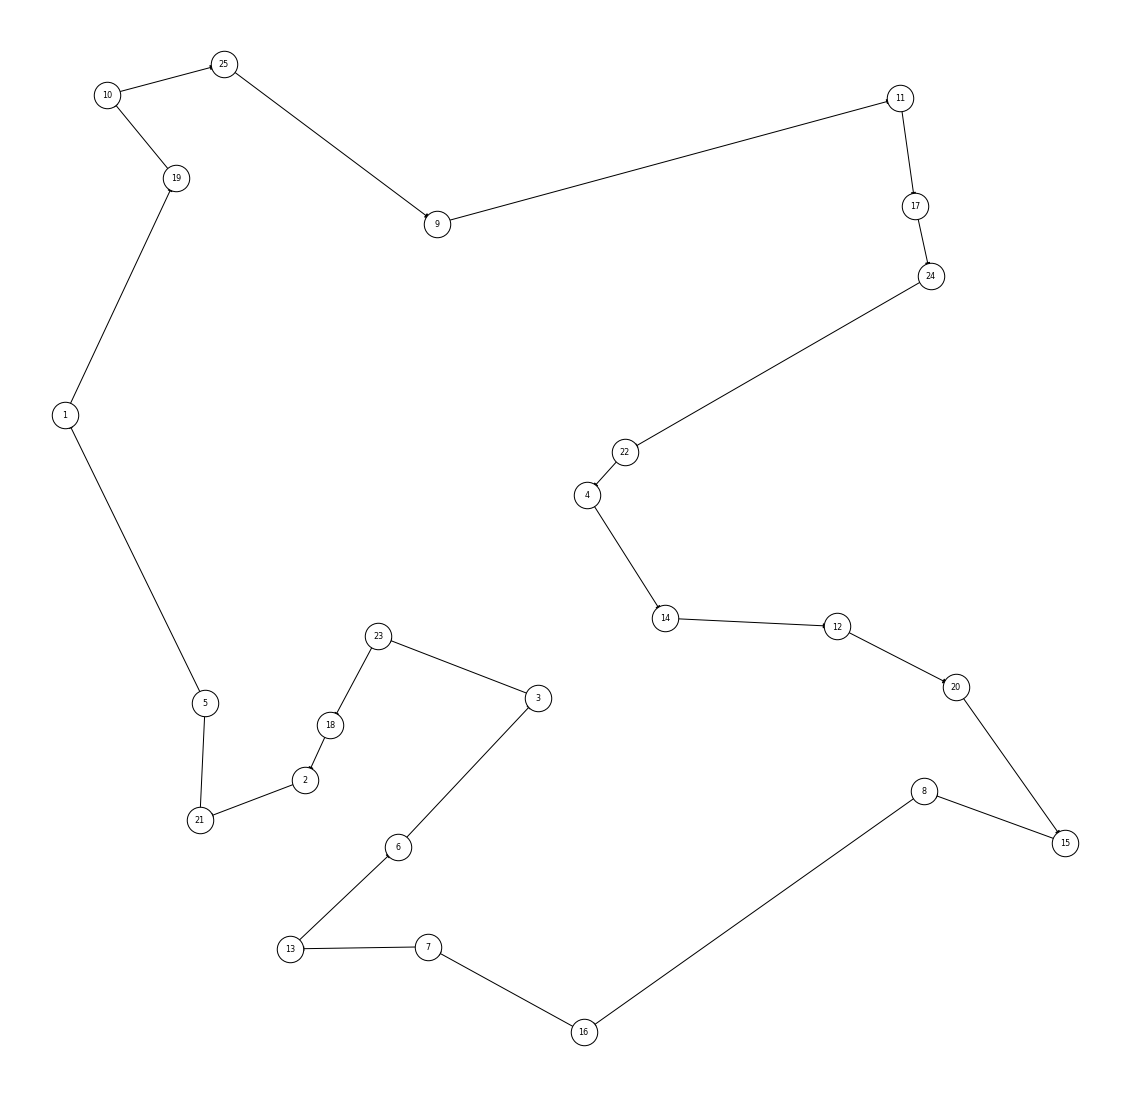

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9083 nonzeros
Model fingerprint: 0x3d9b329e
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 719 columns
Presolve time: 0.02s
Presolved: 740 rows, 1006 columns, 5440 nonzeros
Variable types: 382 continuous, 624 integer (624 binary)

Root relaxation: objective 1.510621e+04, 232 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15106.2150    0   63          - 15106.2150      -     -    0s
     0     0 15224.0675    0   49          - 15224.0675      -     -   

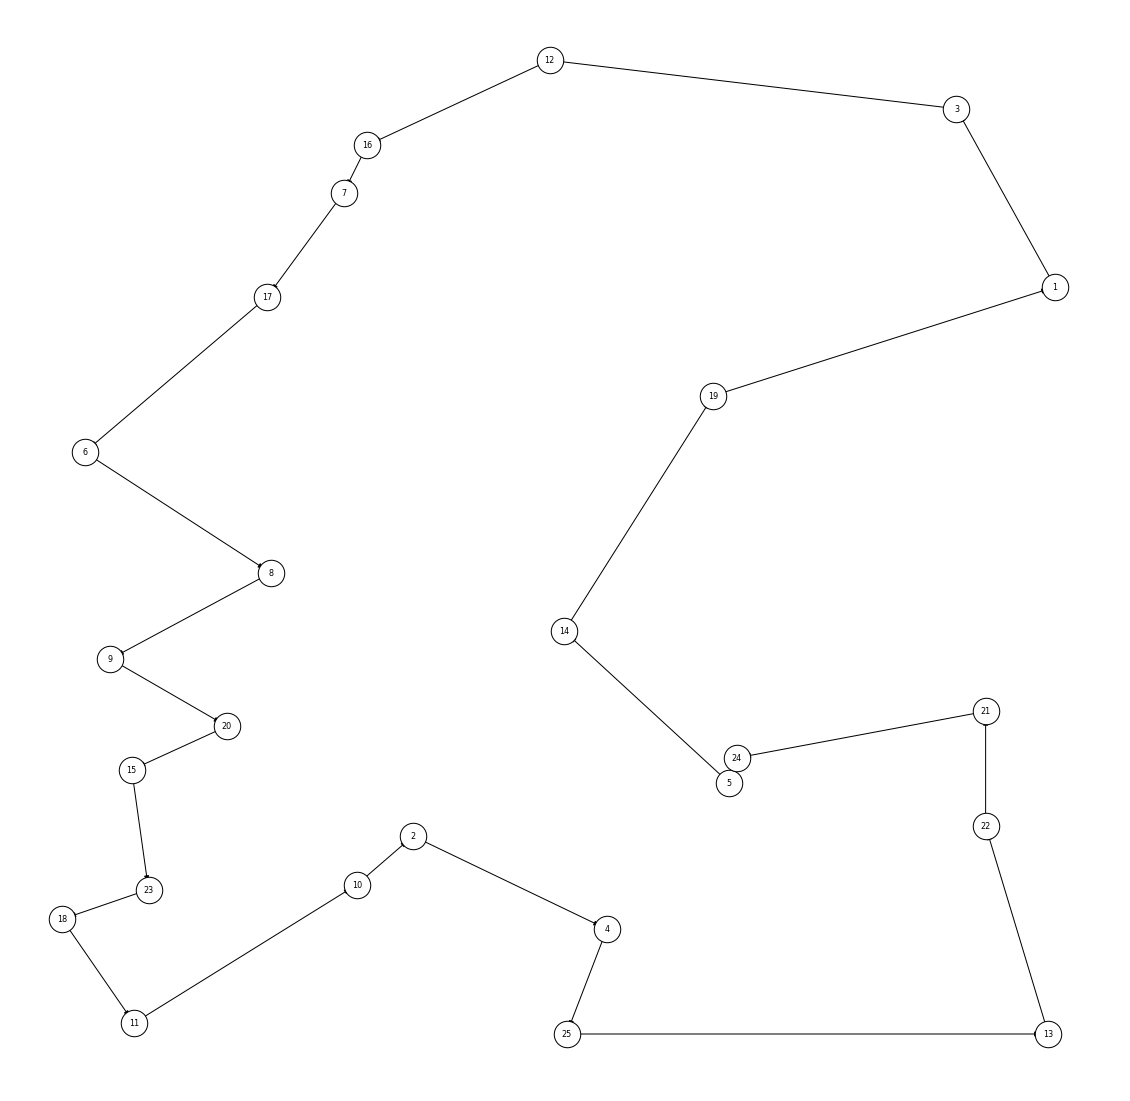

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9110 nonzeros
Model fingerprint: 0xe4889da5
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1025 rows and 685 columns
Presolve time: 0.03s
Presolved: 741 rows, 1040 columns, 5576 nonzeros
Variable types: 416 continuous, 624 integer (624 binary)

Root relaxation: objective 1.569069e+04, 250 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15690.6873    0   58          - 15690.6873      -     -    0s
     0     0 16175.0766    0   41          - 16175.0766      -     -   

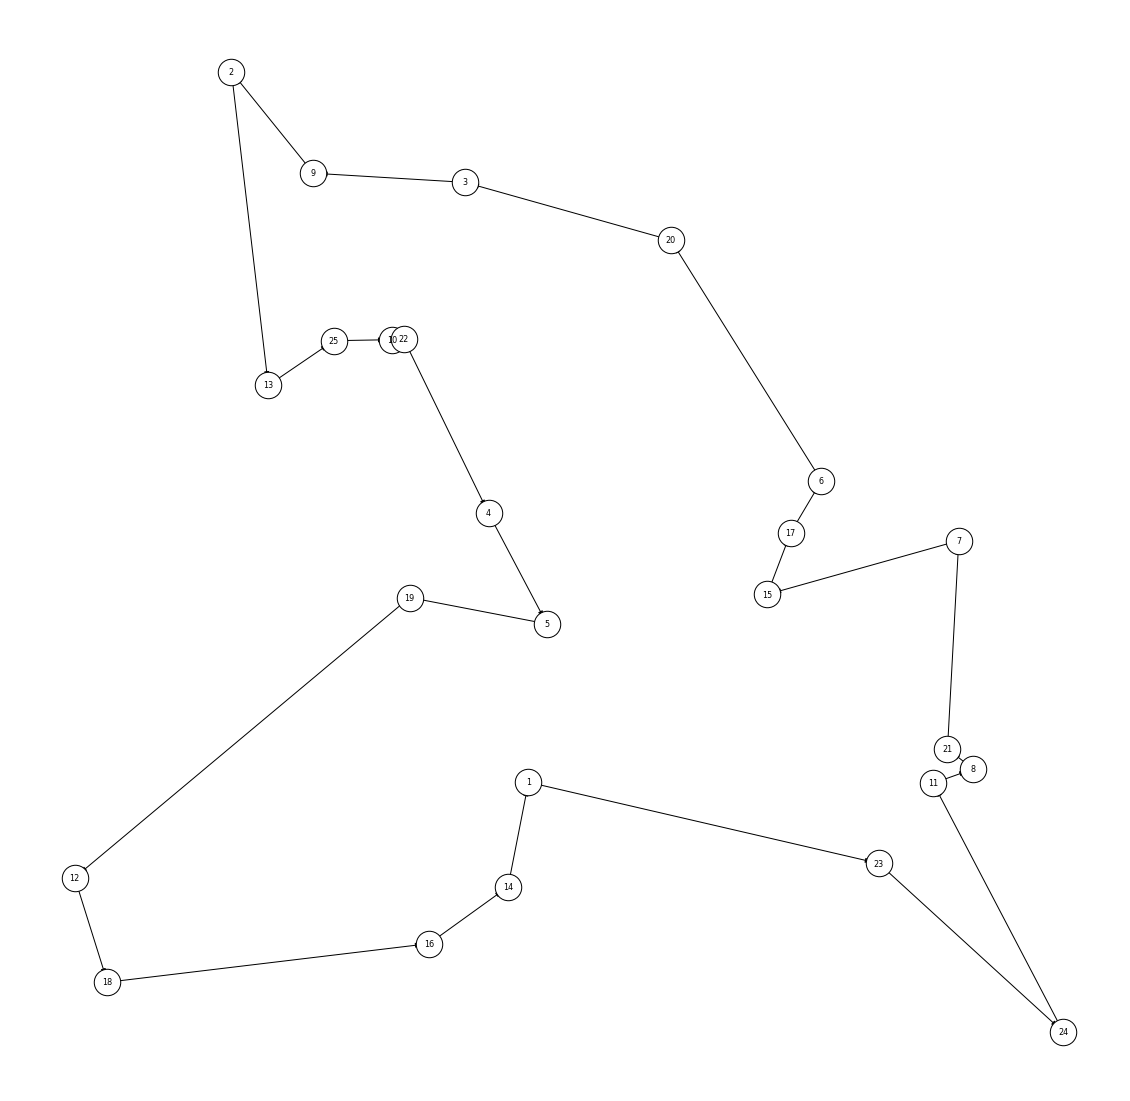

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9178 nonzeros
Model fingerprint: 0x5a679aee
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1023 rows and 631 columns
Presolve time: 0.03s
Presolved: 743 rows, 1094 columns, 5792 nonzeros
Variable types: 470 continuous, 624 integer (624 binary)

Root relaxation: objective 1.637079e+04, 228 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16370.7938    0   58          - 16370.7938      -     -    0s
     0     0 16640.3955    0   43          - 16640.3955      -     -   

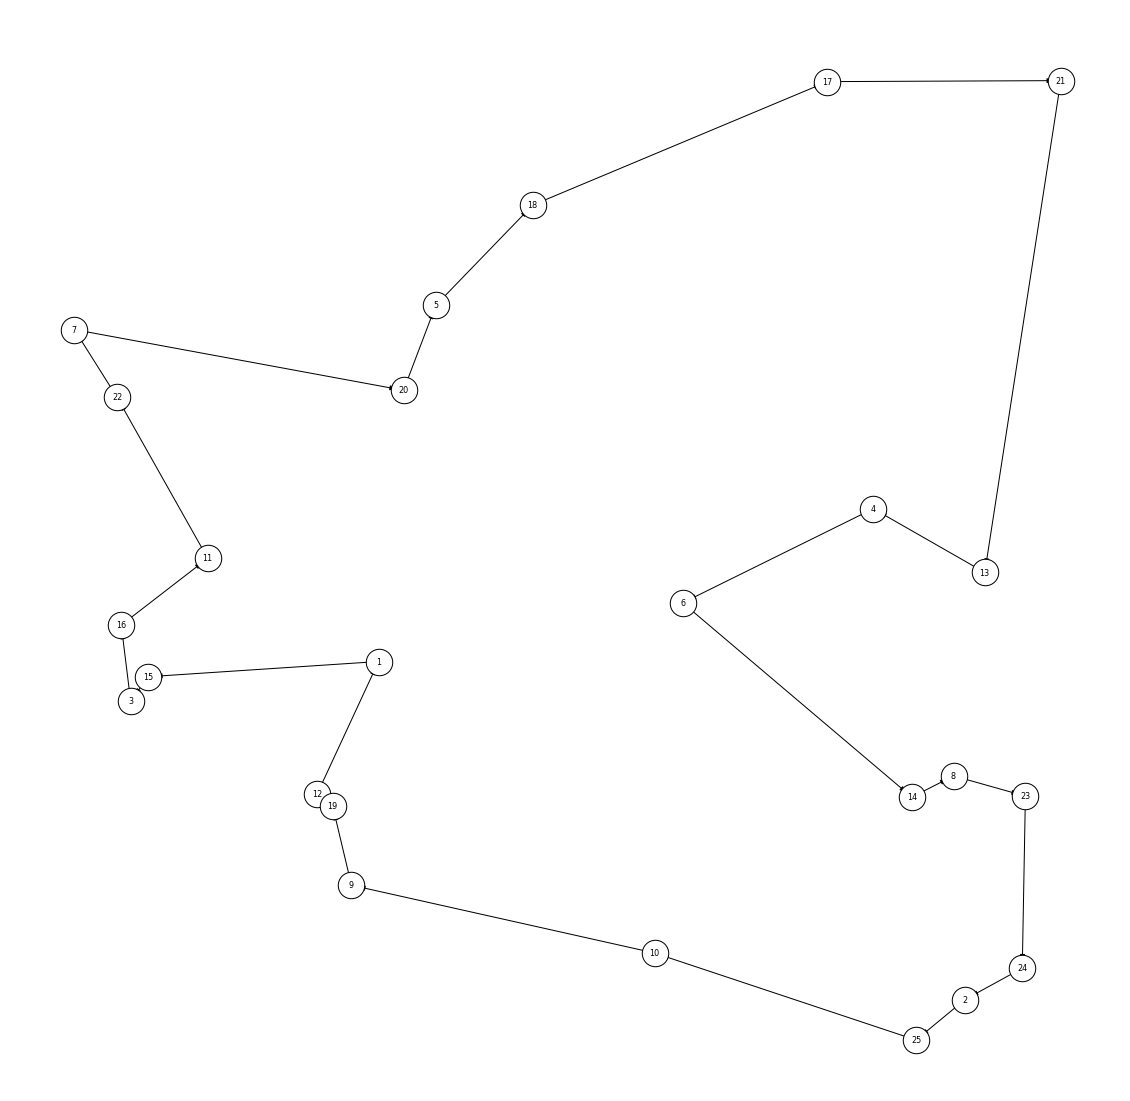

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9064 nonzeros
Model fingerprint: 0xf91991b5
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 732 columns
Presolve time: 0.02s
Presolved: 740 rows, 993 columns, 5388 nonzeros
Variable types: 369 continuous, 624 integer (624 binary)

Root relaxation: objective 1.311740e+04, 221 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13117.4019    0   69          - 13117.4019      -     -    0s
     0     0 13527.5859    0   49          - 13527.5859      -     -    

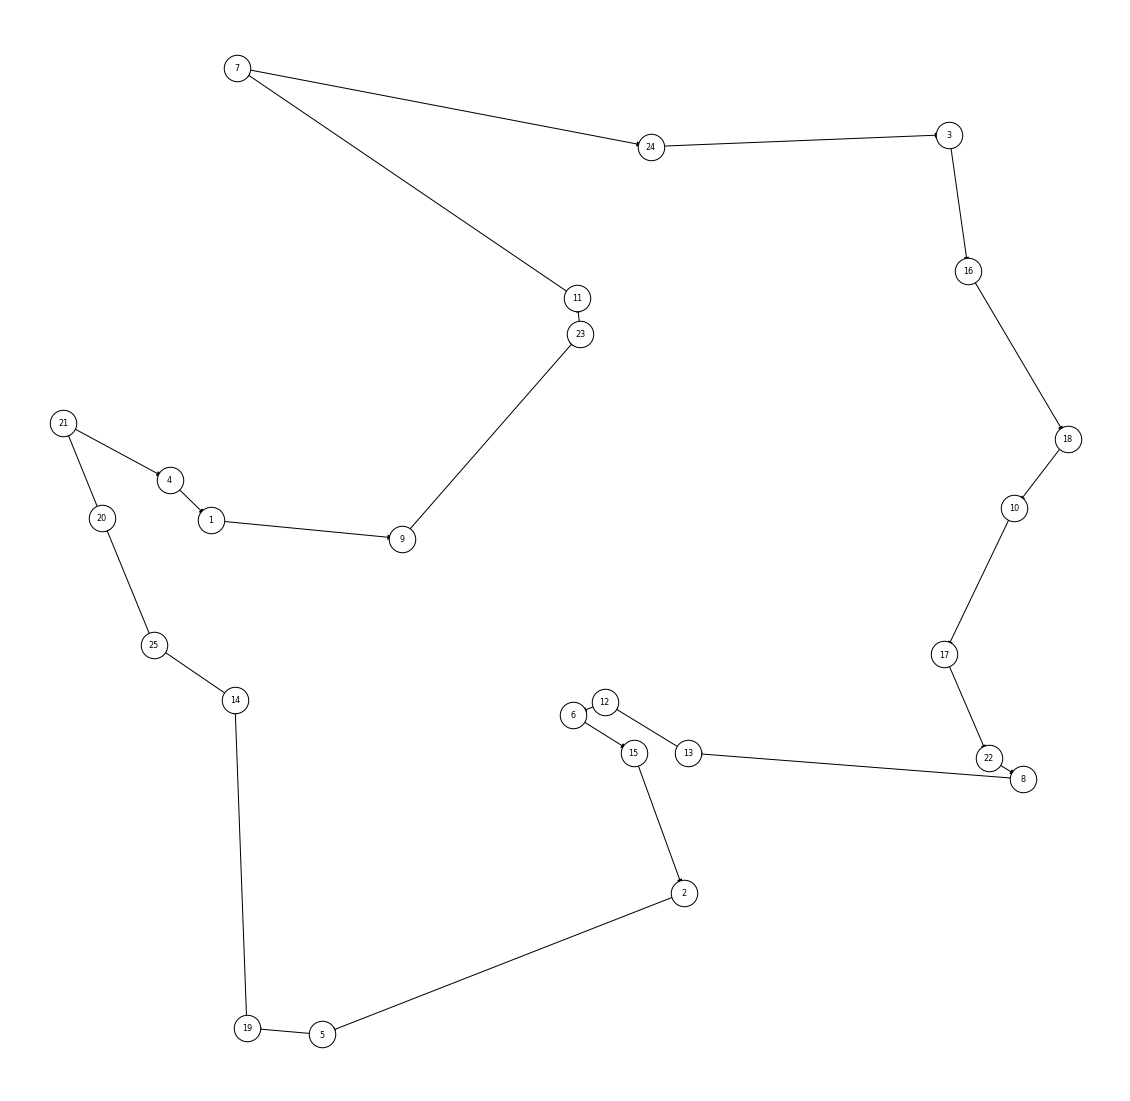

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9087 nonzeros
Model fingerprint: 0x9c8c2d16
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1024 rows and 686 columns
Presolve time: 0.02s
Presolved: 742 rows, 1039 columns, 5572 nonzeros
Variable types: 415 continuous, 624 integer (624 binary)

Root relaxation: objective 1.313658e+04, 231 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13136.5835    0   43          - 13136.5835      -     -    0s
     0     0 13242.9402    0   43          - 13242.9402      -     -   

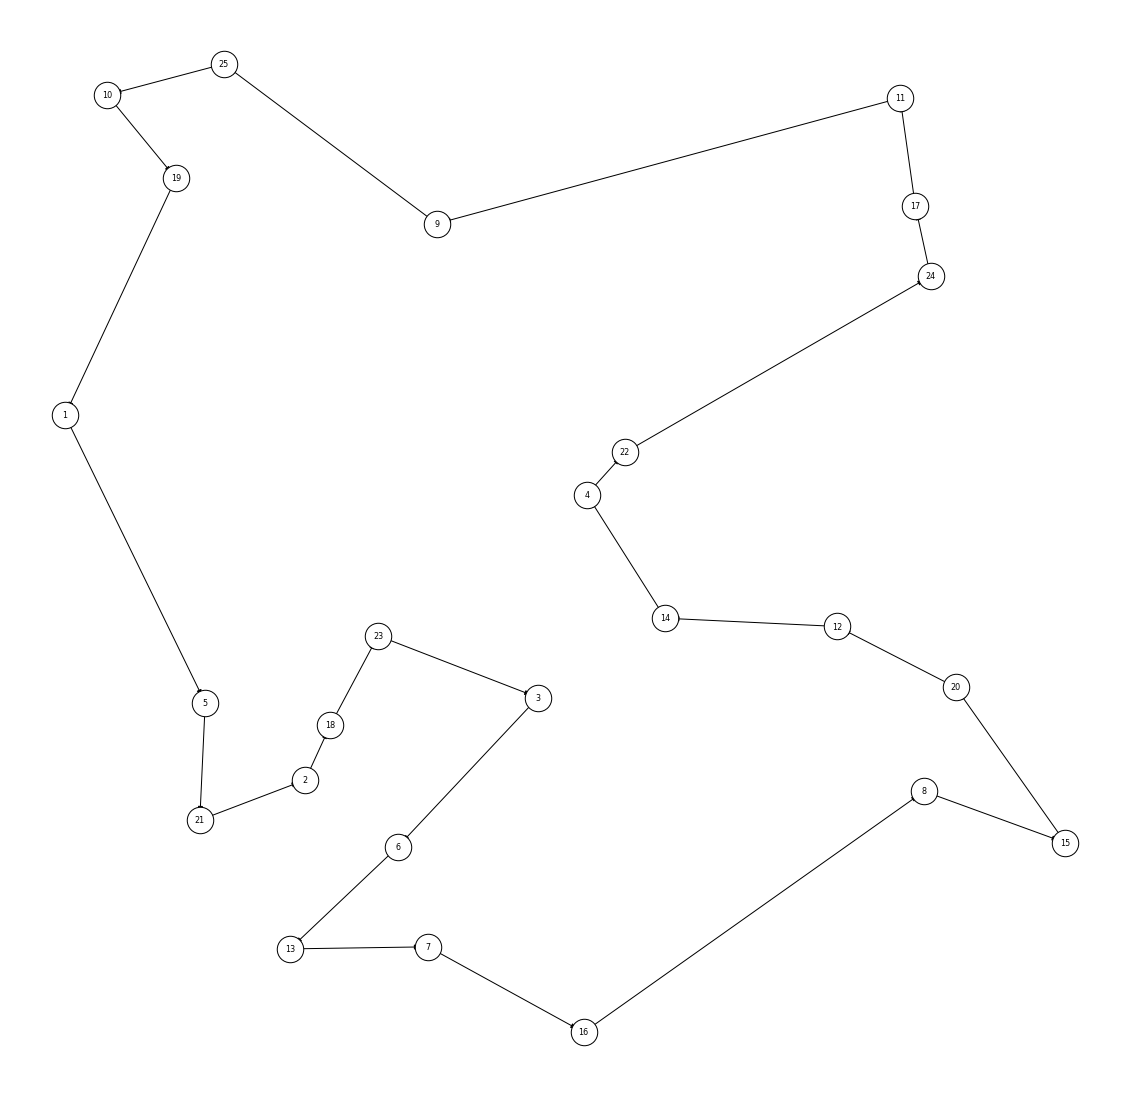

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9067 nonzeros
Model fingerprint: 0xea96a24a
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 974 rows and 735 columns
Presolve time: 0.03s
Presolved: 792 rows, 990 columns, 5481 nonzeros
Variable types: 357 continuous, 633 integer (633 binary)

Root relaxation: objective 1.320091e+04, 311 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13200.9134    0   67          - 13200.9134      -     -    0s
     0     0 13454.7753    0   49          - 13454.7753      -     -    0

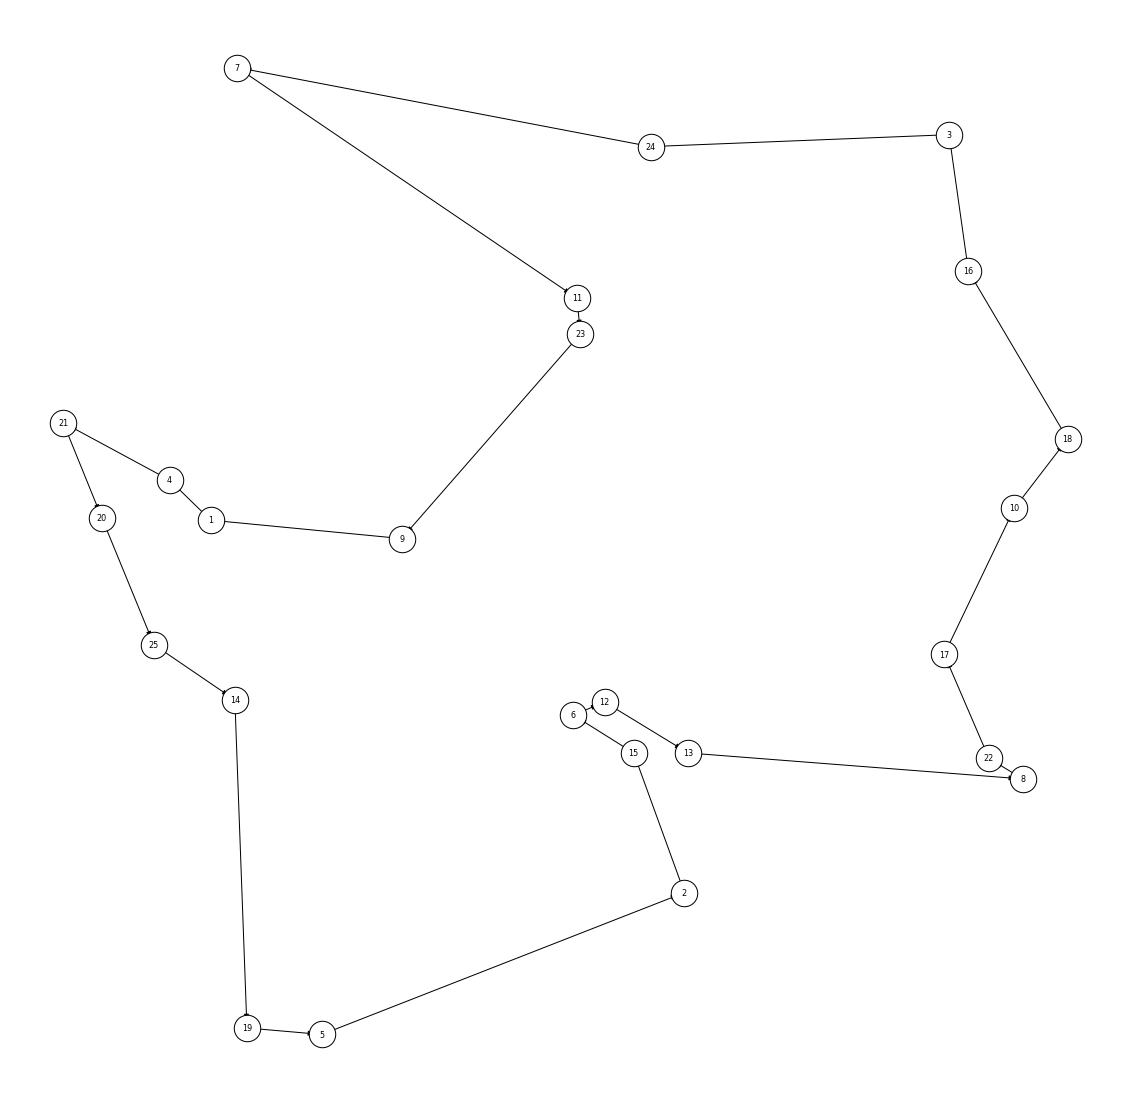

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9078 nonzeros
Model fingerprint: 0x7926e793
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1028 rows and 742 columns
Presolve time: 0.02s
Presolved: 738 rows, 983 columns, 5348 nonzeros
Variable types: 359 continuous, 624 integer (624 binary)

Root relaxation: objective 1.628952e+04, 231 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 16289.5212    0   63          - 16289.5212      -     -    0s
     0     0 16318.9026    0   46          - 16318.9026      -     -    

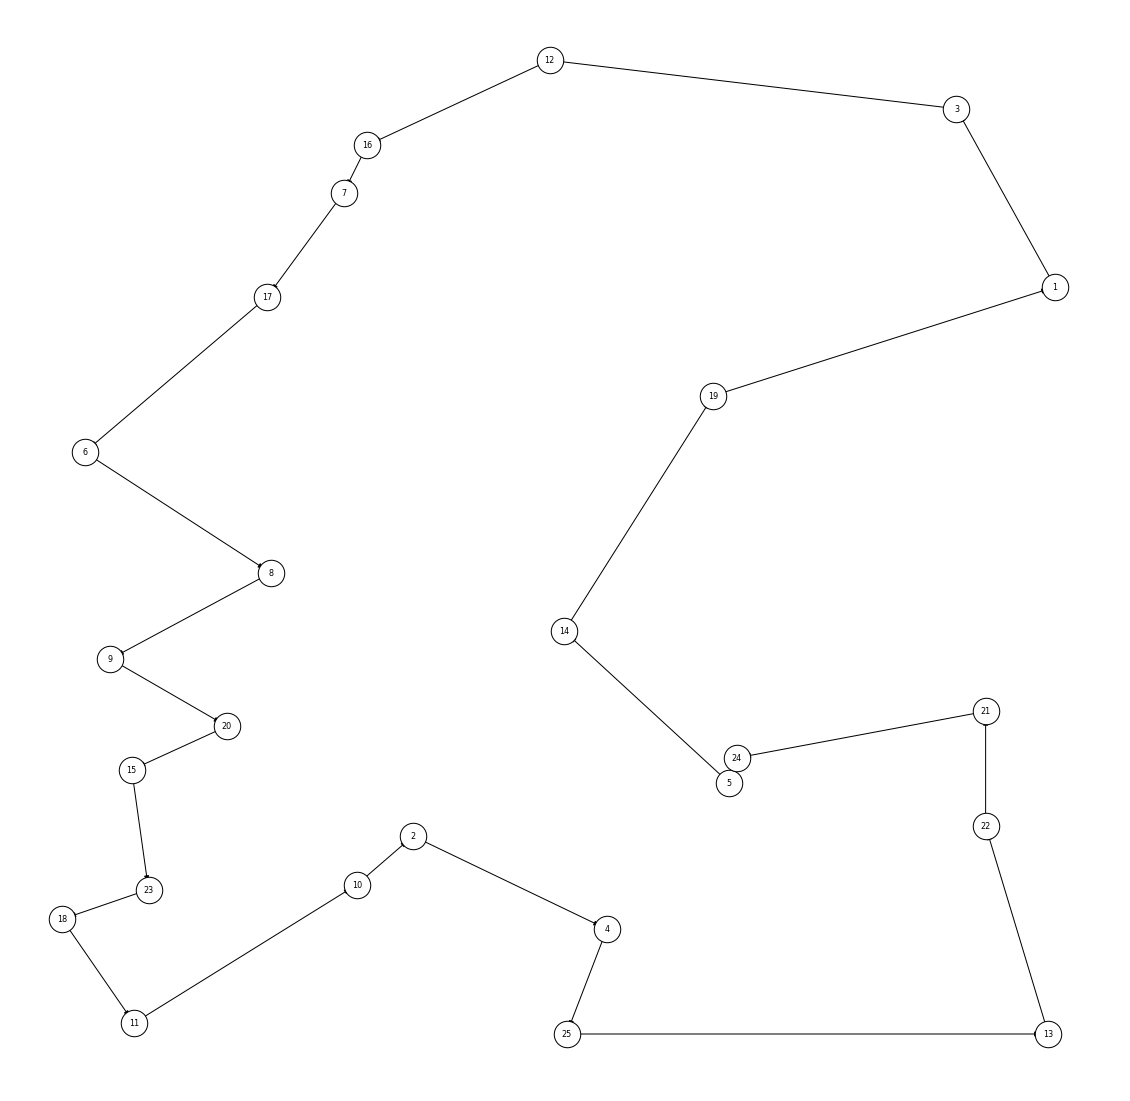

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9094 nonzeros
Model fingerprint: 0x00104ae3
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1025 rows and 690 columns
Presolve time: 0.02s
Presolved: 741 rows, 1035 columns, 5556 nonzeros
Variable types: 411 continuous, 624 integer (624 binary)

Root relaxation: objective 1.331589e+04, 234 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13315.8898    0   59          - 13315.8898      -     -    0s
H    0     0                    25502.000000 13315.8898  47.8%     -   

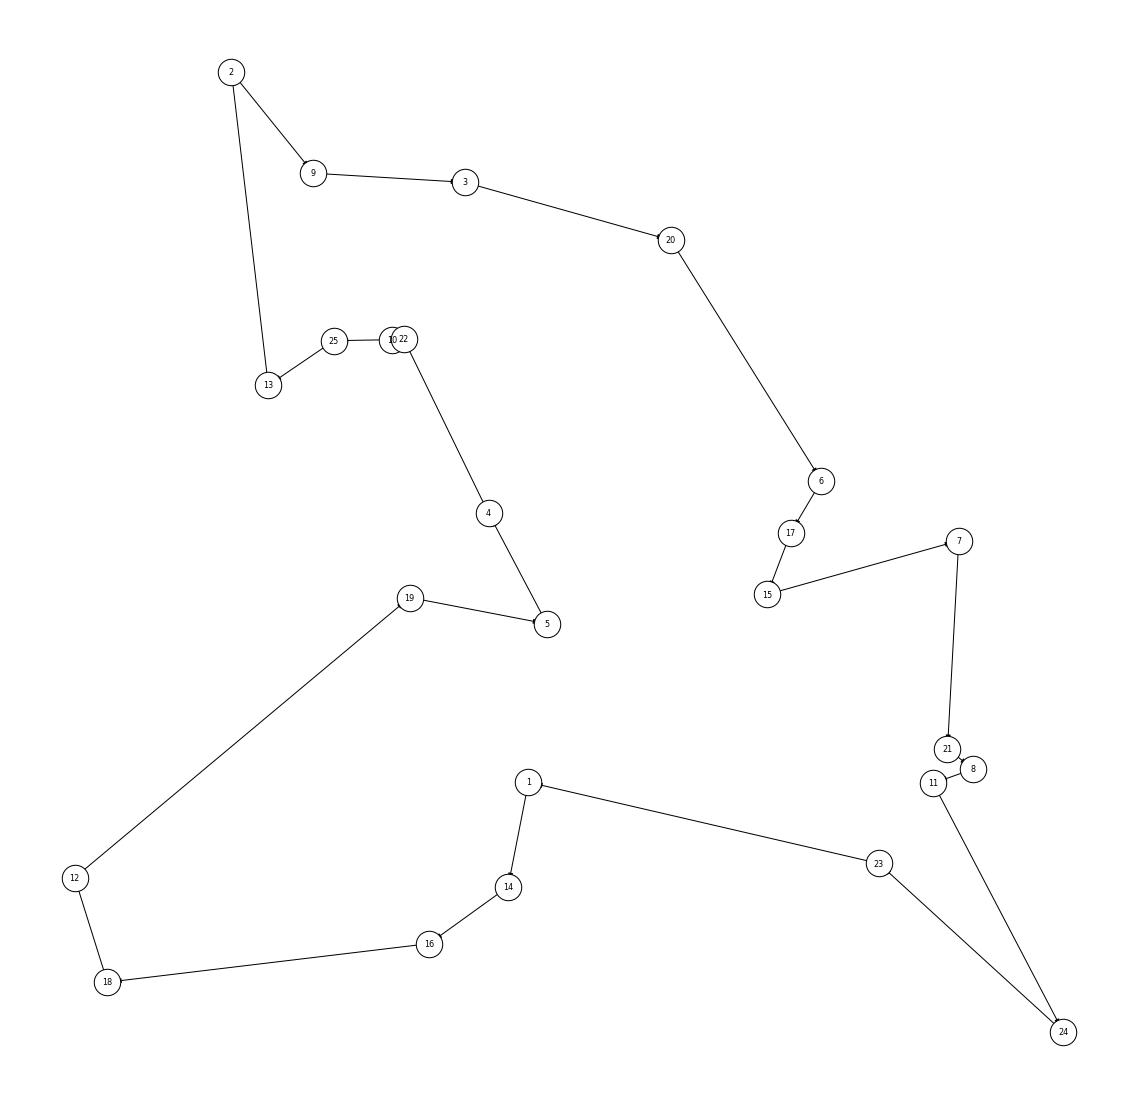

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9178 nonzeros
Model fingerprint: 0x47114293
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1022 rows and 610 columns
Presolve time: 0.03s
Presolved: 744 rows, 1115 columns, 5876 nonzeros
Variable types: 491 continuous, 624 integer (624 binary)

Root relaxation: objective 1.563962e+04, 267 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15639.6220    0   67          - 15639.6220      -     -    0s
     0     0 15965.6024    0   46          - 15965.6024      -     -   

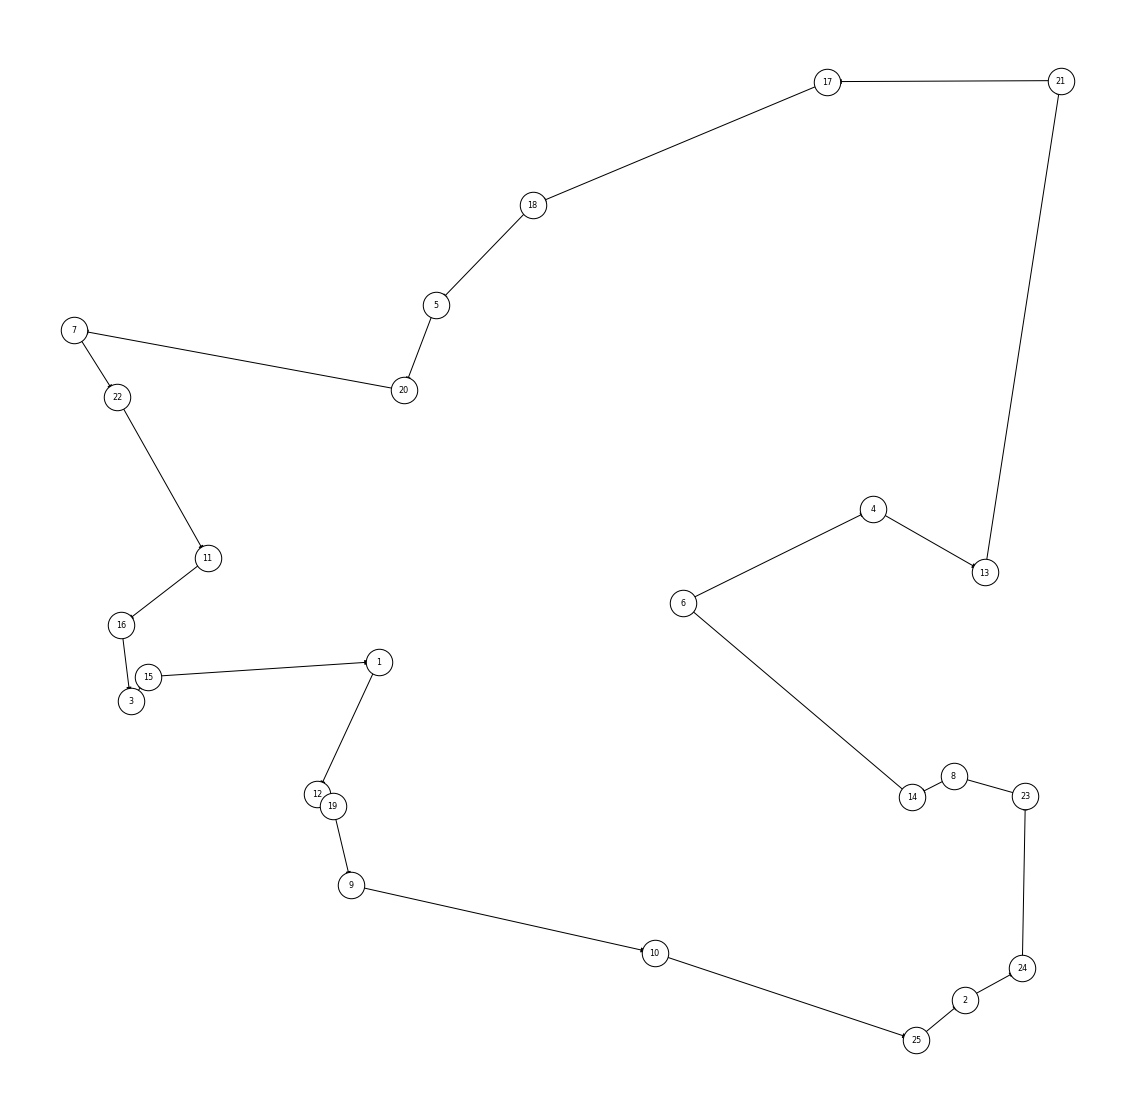

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9064 nonzeros
Model fingerprint: 0xafff63fe
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1026 rows and 732 columns
Presolve time: 0.03s
Presolved: 740 rows, 993 columns, 5388 nonzeros
Variable types: 369 continuous, 624 integer (624 binary)

Root relaxation: objective 1.276524e+04, 252 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 12765.2414    0   73          - 12765.2414      -     -    0s
     0     0 13178.8251    0   57          - 13178.8251      -     -    

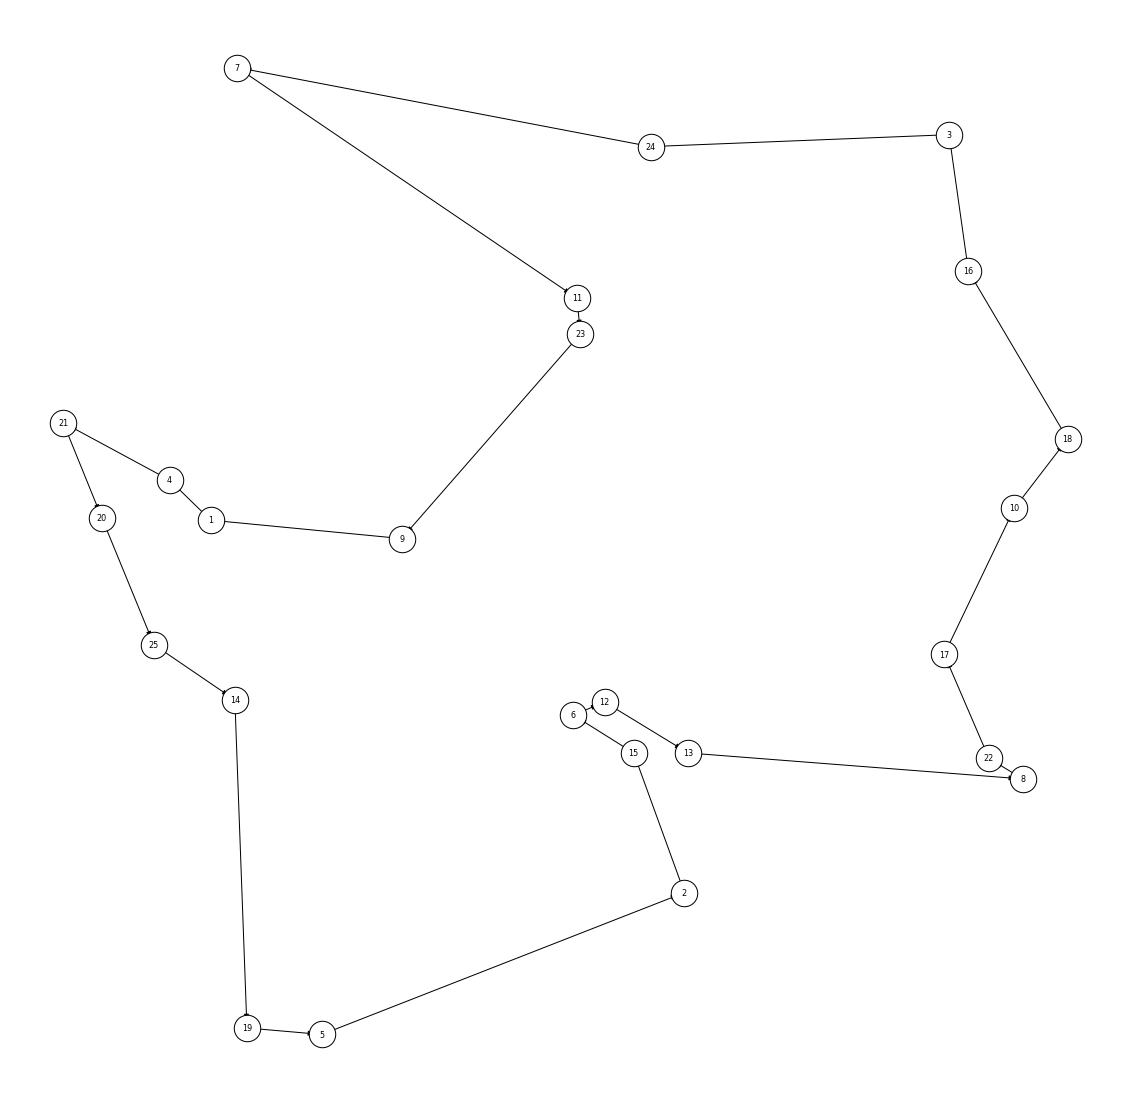

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9087 nonzeros
Model fingerprint: 0x9ab42249
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1024 rows and 686 columns
Presolve time: 0.02s
Presolved: 742 rows, 1039 columns, 5572 nonzeros
Variable types: 415 continuous, 624 integer (624 binary)

Root relaxation: objective 1.307245e+04, 215 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13072.4524    0   43          - 13072.4524      -     -    0s
     0     0 13187.1233    0   53          - 13187.1233      -     -   

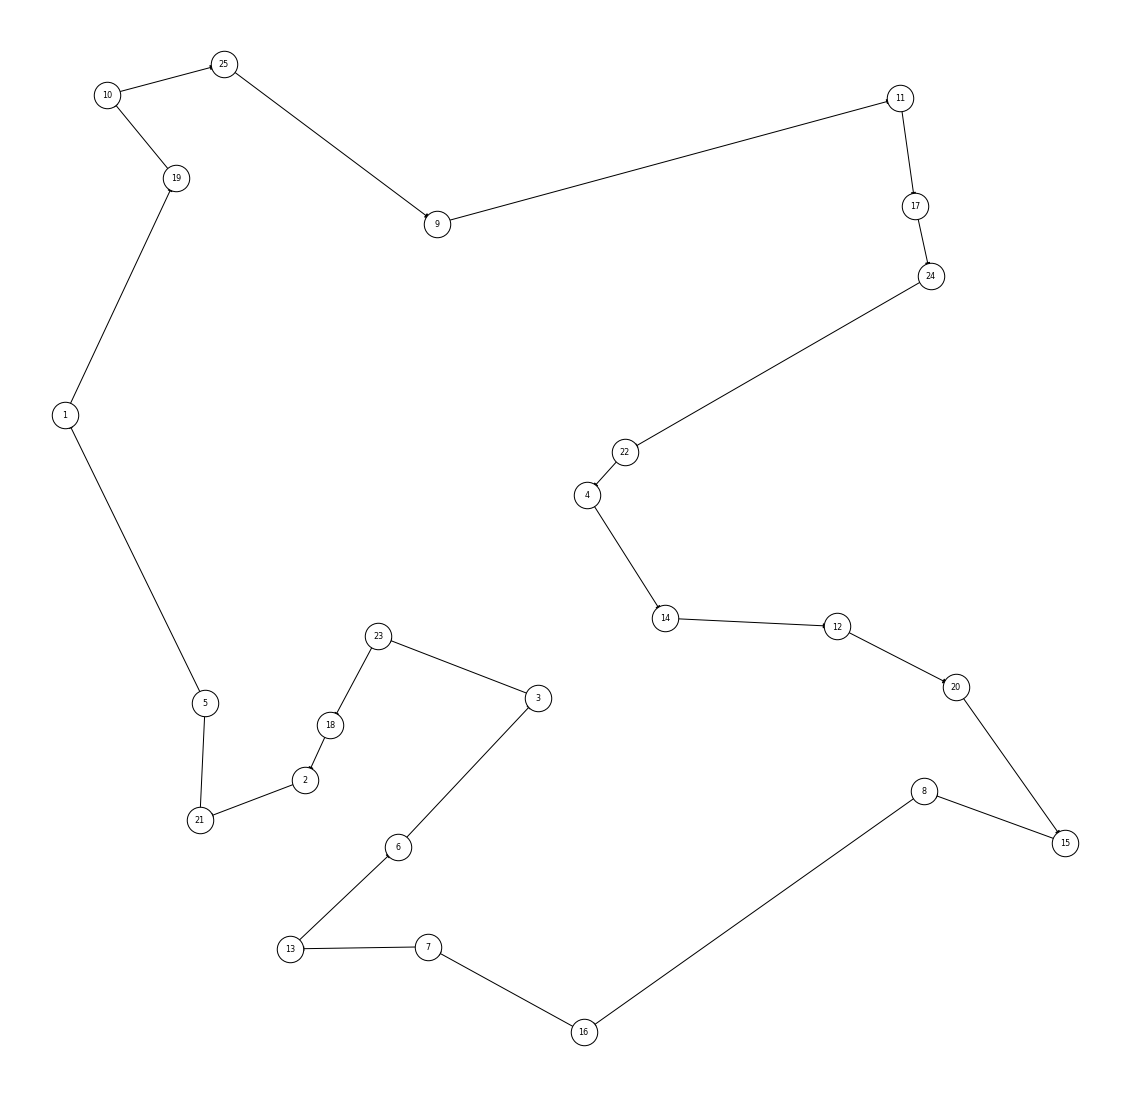

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9078 nonzeros
Model fingerprint: 0xfe3978c7
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1028 rows and 742 columns
Presolve time: 0.02s
Presolved: 738 rows, 983 columns, 5348 nonzeros
Variable types: 359 continuous, 624 integer (624 binary)

Root relaxation: objective 1.527516e+04, 251 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15275.1555    0   66          - 15275.1555      -     -    0s
     0     0 15397.5104    0   47          - 15397.5104      -     -    

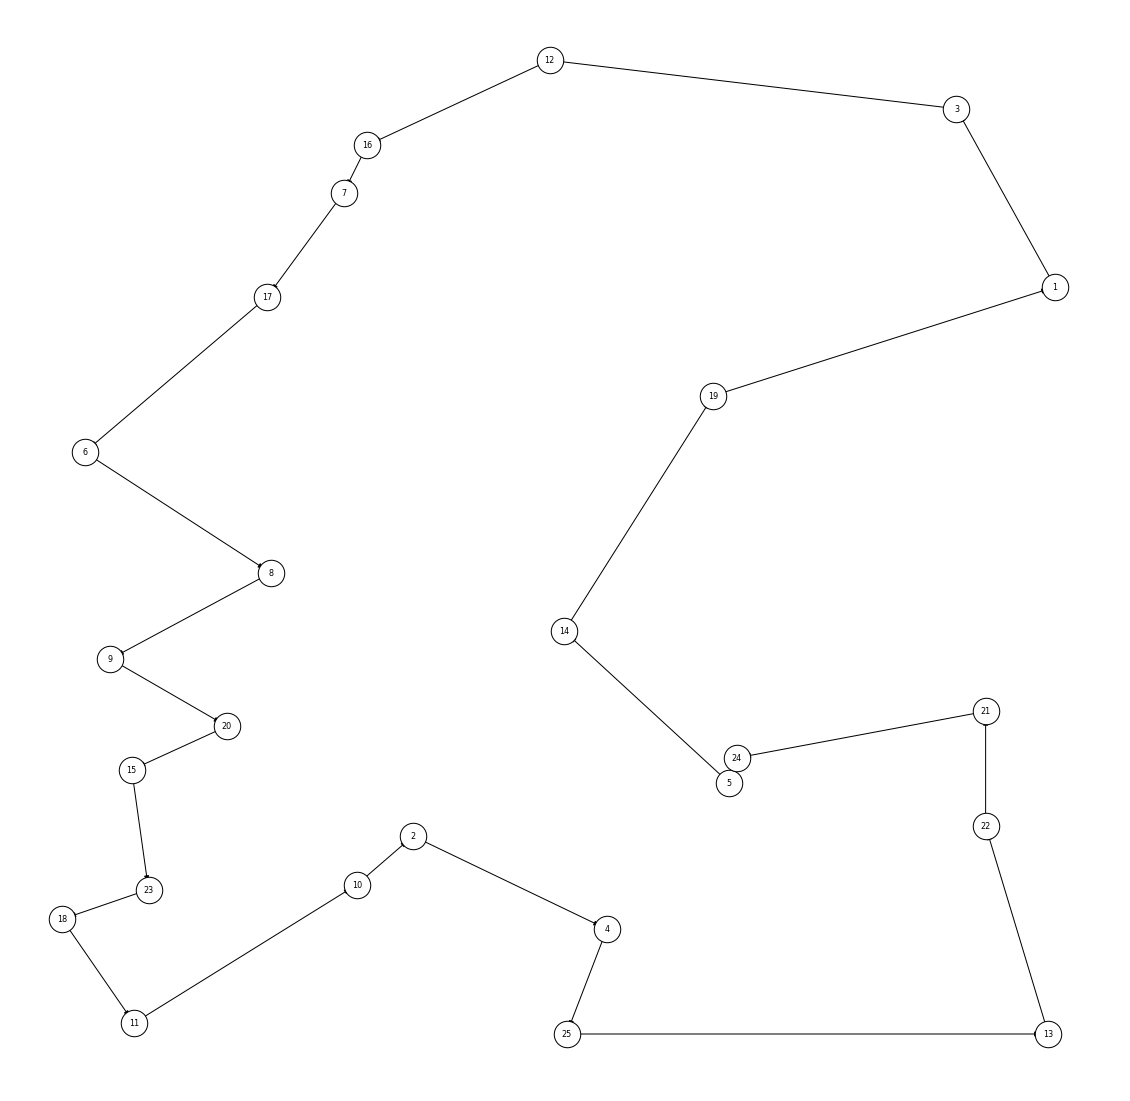

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9088 nonzeros
Model fingerprint: 0x915e236a
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 993 rows and 677 columns
Presolve time: 0.02s
Presolved: 773 rows, 1048 columns, 5665 nonzeros
Variable types: 418 continuous, 630 integer (630 binary)

Root relaxation: objective 1.474709e+04, 244 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14747.0896    0   50          - 14747.0896      -     -    0s
     0     0 14869.3269    0   43          - 14869.3269      -     -    

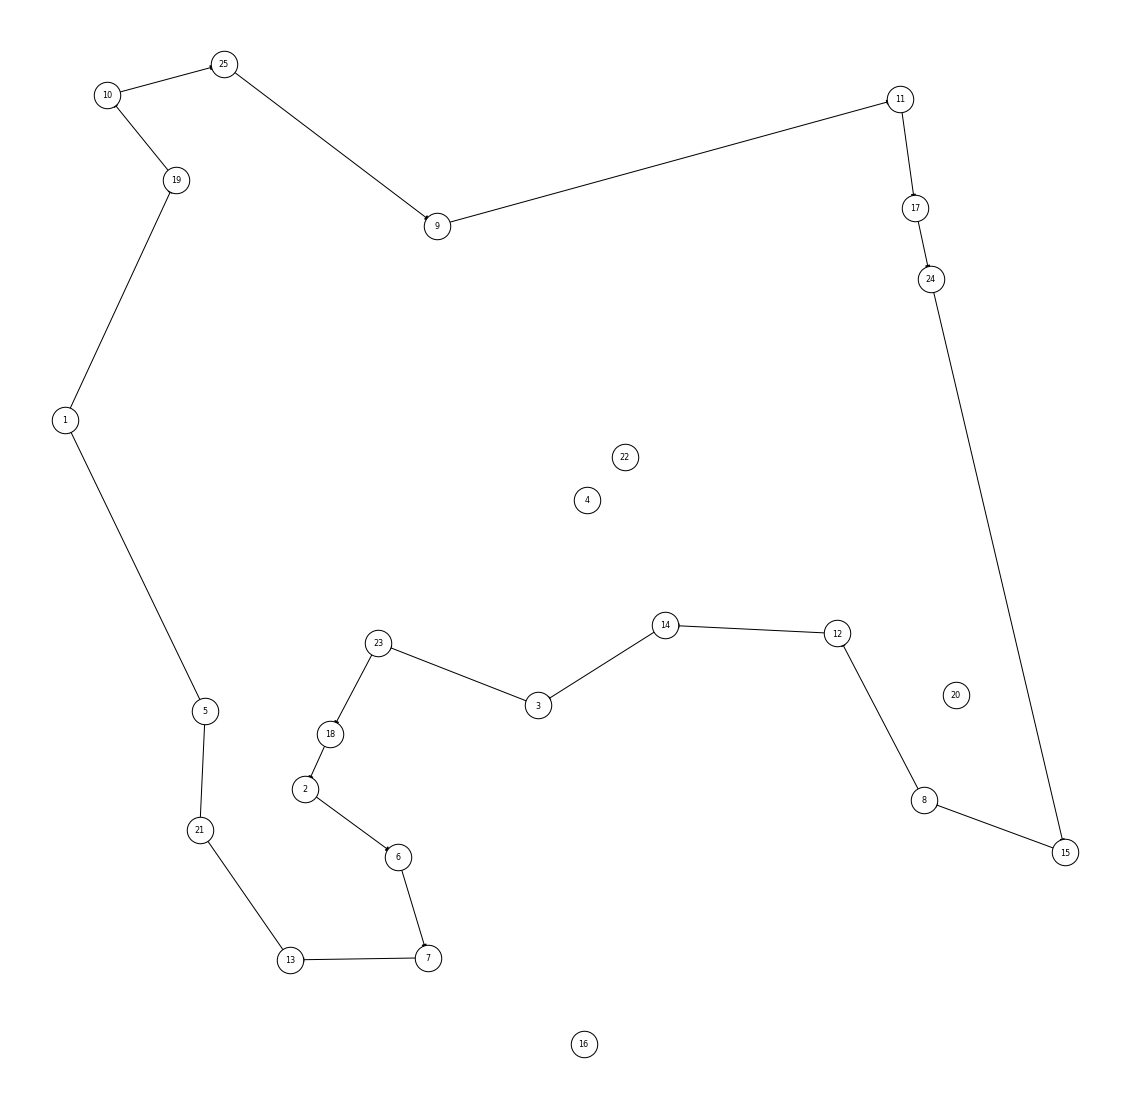

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9084 nonzeros
Model fingerprint: 0x302951a1
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 1017 rows and 735 columns
Presolve time: 0.02s
Presolved: 749 rows, 990 columns, 5402 nonzeros
Variable types: 364 continuous, 626 integer (626 binary)

Root relaxation: objective 1.531180e+04, 266 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 15311.8009    0   61          - 15311.8009      -     -    0s
     0     0 15476.0046    0   43          - 15476.0046      -     -    

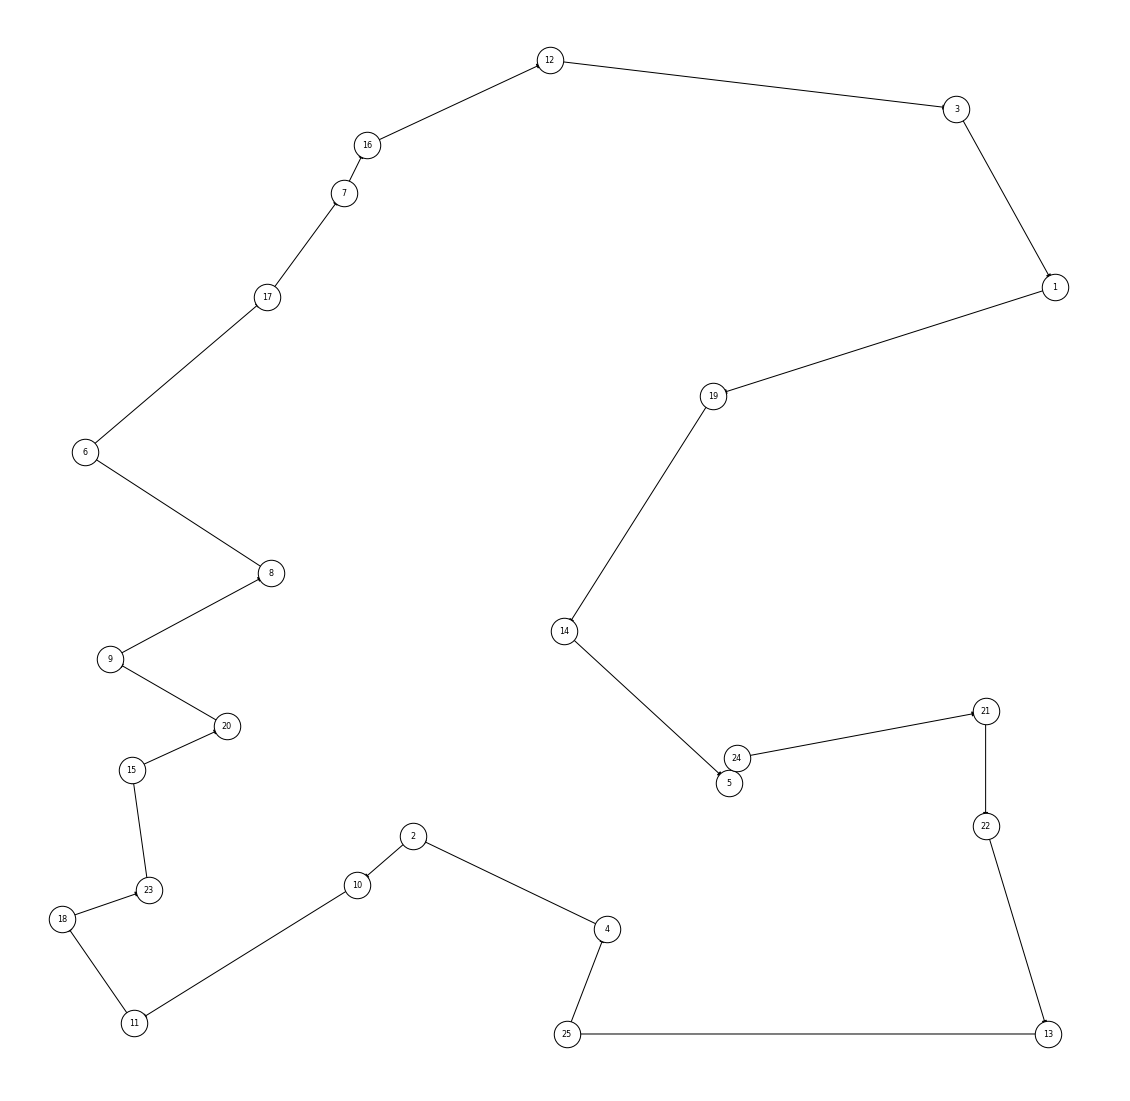

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9097 nonzeros
Model fingerprint: 0xe0327009
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 942 rows and 697 columns
Presolve time: 0.02s
Presolved: 824 rows, 1028 columns, 5686 nonzeros
Variable types: 394 continuous, 634 integer (634 binary)

Root relaxation: objective 1.384916e+04, 246 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 13849.1565    0   47          - 13849.1565      -     -    0s
H    0     0                    46741.000000 13849.1565  70.4%     -    

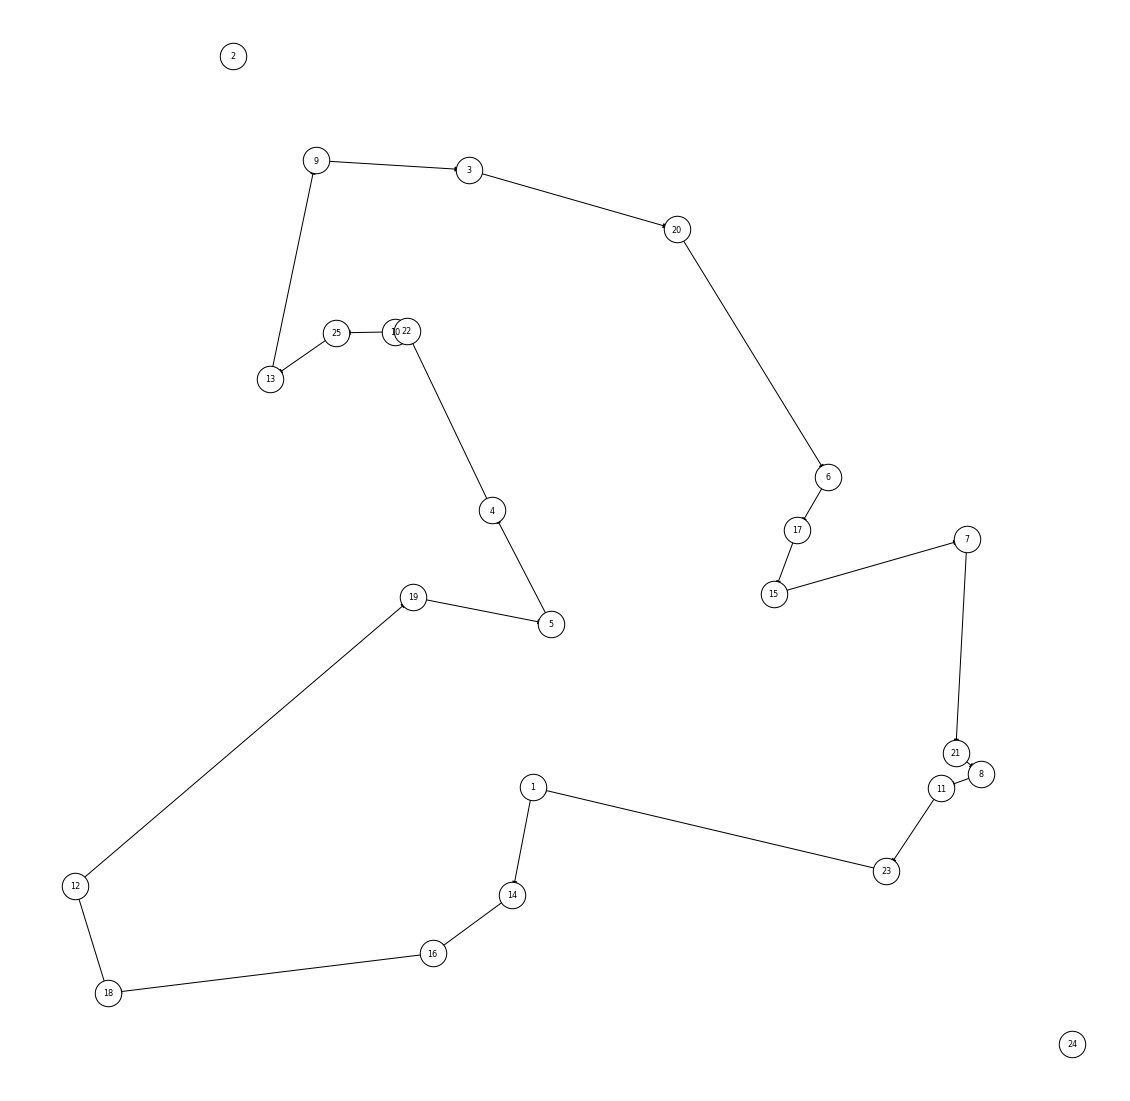

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9177 nonzeros
Model fingerprint: 0x49fe7145
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 922 rows and 572 columns
Presolve time: 0.03s
Presolved: 844 rows, 1153 columns, 6216 nonzeros
Variable types: 521 continuous, 632 integer (632 binary)

Root relaxation: objective 1.446796e+04, 299 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14467.9591    0   62          - 14467.9591      -     -    0s
     0     0 14695.4473    0   59          - 14695.4473      -     -    

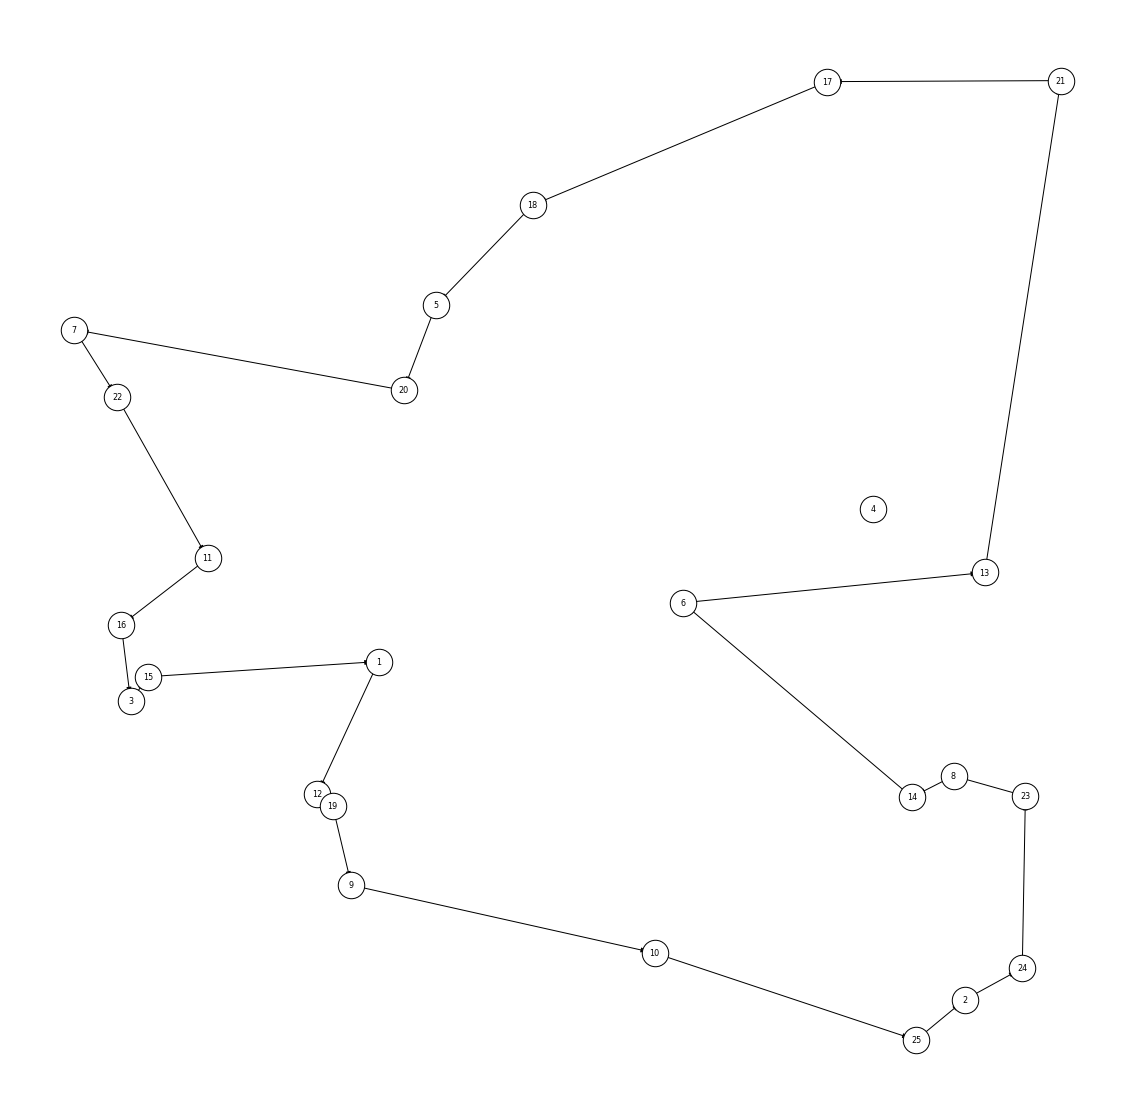

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9067 nonzeros
Model fingerprint: 0xf76837d5
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 980 rows and 736 columns
Presolve time: 0.03s
Presolved: 786 rows, 989 columns, 5465 nonzeros
Variable types: 357 continuous, 632 integer (632 binary)

Root relaxation: objective 1.297531e+04, 273 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 12975.3065    0   63          - 12975.3065      -     -    0s
     0     0 13228.3676    0   52          - 13228.3676      -     -    0

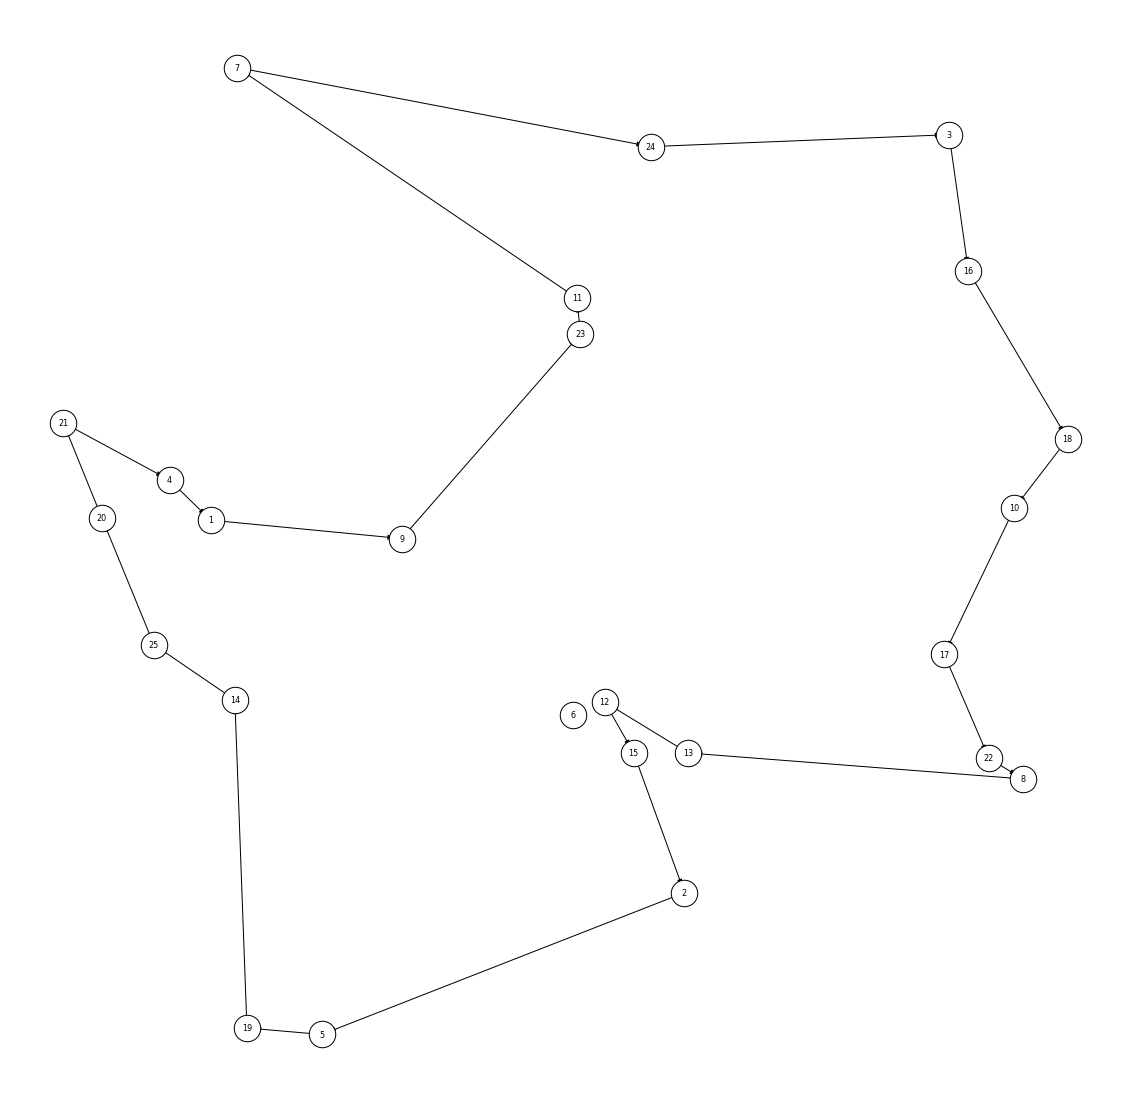

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 4 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 1766 rows, 1725 columns and 9088 nonzeros
Model fingerprint: 0xd9fe87af
Variable types: 1075 continuous, 650 integer (650 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+05]
  Objective range  [1e+00, 1e+03]
  Bounds range     [1e+00, 3e+05]
  RHS range        [1e+00, 3e+05]
Presolve removed 994 rows and 678 columns
Presolve time: 0.02s
Presolved: 772 rows, 1047 columns, 5660 nonzeros
Variable types: 418 continuous, 629 integer (629 binary)

Root relaxation: objective 1.411617e+04, 284 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 14116.1674    0   52          - 14116.1674      -     -    0s
     0     0 14224.7395    0   43          - 14224.7395      -     -    

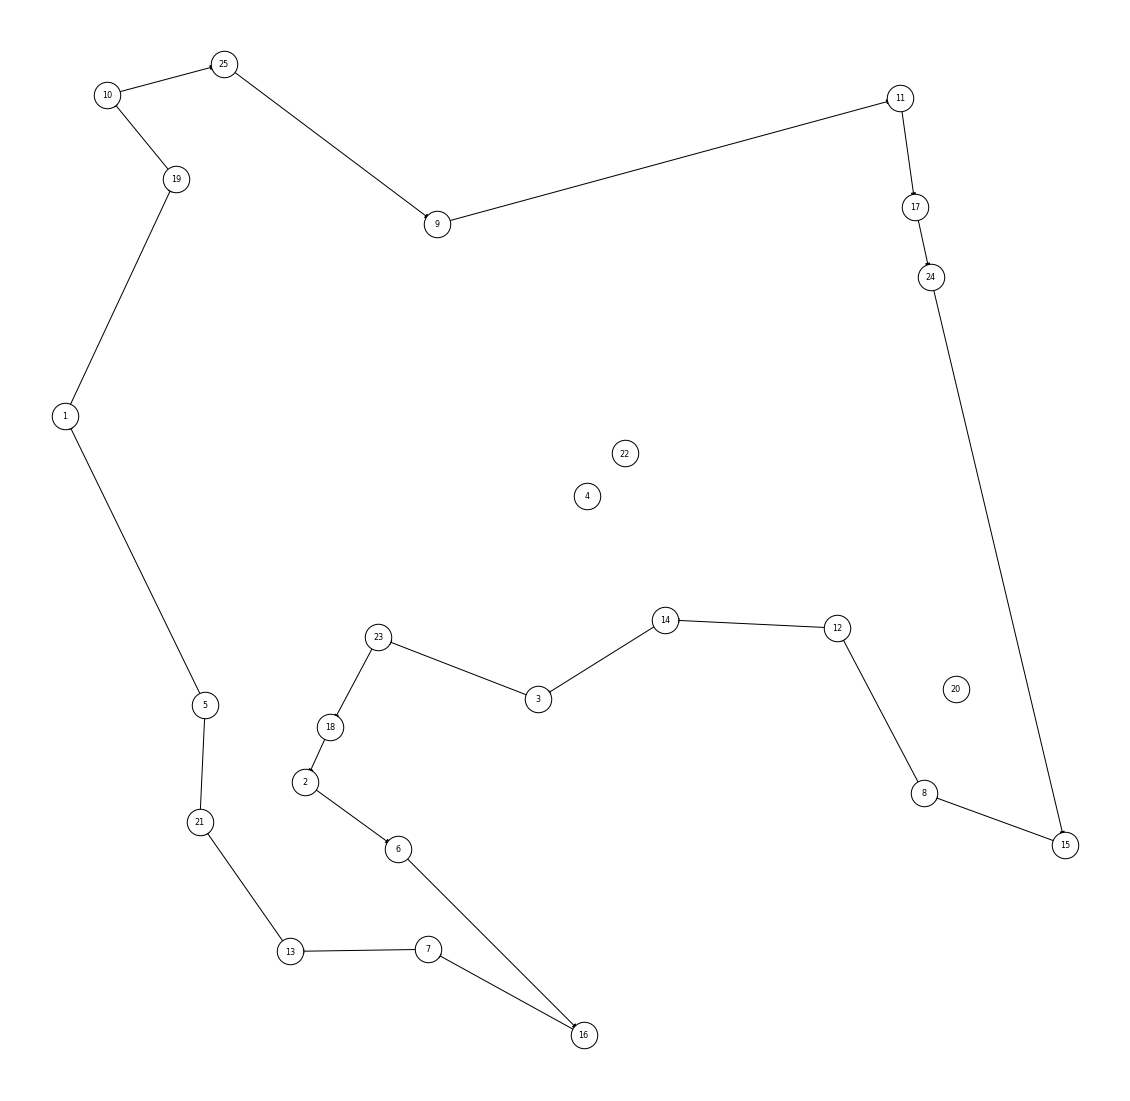

In [60]:
path = './Examples/Graphs/'
solutions25 = []
for entry_number, filename in enumerate(os.listdir(path)):
    f = os.path.join(path, filename)
    if os.path.isfile(f):
        args.filename = f
        args.figsize =  (20,20)
        basename = os.path.splitext(args.filename)[0]
        G = nx.read_gml (args.filename)#, node_type=int)
        G = G.to_directed()
        G = nx.relabel.convert_node_labels_to_integers(G, first_label=1)
        for i in range(26, G.number_of_nodes() + 1):
            G.remove_node(i)
        number_of_product = 50
        d = np.zeros((number_of_product), dtype="float32")
        for i in range(1, G.number_of_nodes()+1):
            availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
            for k in range(0, number_of_product):
                d[k] += availability_for_market[k]
        mean_d_k = np.round(np.mean(d))
        for k, element in enumerate(d):
            if element >= mean_d_k:
                d[k] = d[k] - np.random.randint(mean_d_k+1, size=1)[0]
        d = d[0:40]
        number_of_product = 40
        limit_time = 0
        for i,j in G.edges():
            limit_time += float(G.edges()[i, j]['distance']) # in this case because I want get statistics i don't subtract nothing to avoid infesible solutions
        markets_availability = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # q_ik
        for i in range(1, G.number_of_nodes()+1):
            availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
            for k in range(0, number_of_product):
                markets_availability[i-1,k] = availability_for_market[k]
        markets_fast_service_cost = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # hp_ik
        markets_standard_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp'_ik
        markets_fast_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp''_ik
        for i in range(1, G.number_of_nodes()+1):
            if i == 1:
                continue
            starting_fast_service_cost = float(G.nodes()[i]['fast_cost'])
            starting_standard_service_time = float(G.nodes()[i]['standard_time'])
            starting_fast_service_time = float(G.nodes()[i]['fast_time'])
            for k in range(0, number_of_product):
                markets_fast_service_cost[i-1, k] = starting_fast_service_cost - np.random.randint(np.round((starting_fast_service_cost/8))+1, size=1)[0]
                markets_standard_service_time[i-1, k] = starting_standard_service_time - np.random.randint(np.round(starting_standard_service_time/8)+1, size=1)[0]
                markets_fast_service_time[i-1, k] = starting_fast_service_time - np.random.randint(np.round(starting_fast_service_time/8)+1, size=1)[0]
        atpp_fso = gb.Model()
        x = atpp_fso.addVars(G.edges(), obj=[float(G[i][j]['distance']) for i,j in G.edges()],vtype=gb.GRB.BINARY, name='x')
        o = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.BINARY, name='o')
        r = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="r")
        y = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.BINARY, name="y")
        op = atpp_fso.addVars(G.nodes(), obj=1.0, vtype=gb.GRB.CONTINUOUS, lb=0.0, name="op")
        sp = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="sp")
        z = {}
        for i in range(1, G.number_of_nodes()+1):
            prices_for_market = np.fromstring(G.nodes()[i]['market_cost'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
            for k in range(0, number_of_product):
                z[i,k] = atpp_fso.addVar(obj=prices_for_market[k], lb=0.0, vtype=gb.GRB.CONTINUOUS, name="z[" + str(i) + "," + str(k) + "]")
        z = gb.tupledict(z)
        atpp_fso.addConstrs((x.sum(i,'*') == y[i] for i in G.nodes()), name='1')
        atpp_fso.update()
        atpp_fso.addConstrs((x.sum('*', i) == y[i] for i in G.nodes()), name='2')
        atpp_fso.update()
        atpp_fso.addConstr((gb.quicksum(x[i, j] for i, j in G.edges() if i == 1 and i != j) == 1), name='3')
        atpp_fso.update()
        atpp_fso.addConstrs((z.sum('*', k) == d[k] for k in range(0, number_of_product)), name='5')
        atpp_fso.update()
        atpp_fso.addConstrs((z[i, k] <= (markets_availability[i-1, k] * y[i]) for i in range(1, G.number_of_nodes()+1) for k in range(0, number_of_product)), name='6')
        atpp_fso.update()
        atpp_fso.addConstrs((r[i] + sp[i] + 
                             (x[i, j] * float(G.edges()[i, j]['distance'])) <= 
                             r[j] + (float(limit_time) * (1 - x[i, j])) 
                             for i in G.nodes() for j in G.nodes() if i != j and i != 1 and j != 1), name="7")
        atpp_fso.update()
        atpp_fso.addConstrs(((x[1, j] * float(G.edges()[1, j]['distance'])) <= 
                     r[j] + (float(limit_time) * (1 - x[1, j])) 
                     for j in G.nodes() if j != 1), name="8")
        atpp_fso.update()
        atpp_fso.addConstrs((r[i] + sp[i] + 
                     (x[i, 1] * float(G.edges()[i, 1]['distance'])) <= 
                     r[1] + (float(limit_time) * (1 - x[i, 1])) 
                     for i in G.nodes() if i != 1), name="9")
        atpp_fso.update()
        r[root].ub = float(limit_time)   # 10
        atpp_fso.update()
        atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_standard_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='11')
        atpp_fso.update()
        atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_fast_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='12')
        atpp_fso.update()
        atpp_fso.addConstrs((op[i] >= (gb.quicksum(markets_fast_service_cost[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (gb.quicksum(markets_fast_service_cost[i-1, k] * markets_availability[i-1, k] for k in range(0, number_of_product))) * (1 - o[i]) for i in range(1, G.number_of_nodes()+1)), name='13')
        atpp_fso.update()
        atpp_fso.optimize()
        DrawSol(G,x)
        solutions25.append(atpp_fso.RunTime)

In [61]:
print("Number of samples: 35")
print("mean of run time over the samples: " + str(np.mean(solutions25)) + " seconds")
print("std of run time over the samples: " + str(np.std(solutions25)) + " seconds")
print("max of run time over the samples: " + str(np.max(solutions25)) + " seconds")
print("min of run time over the samples: " + str(np.min(solutions25)) + " seconds")

Number of samples: 35
mean of run time over the samples: 4.35637583051409 seconds
std of run time over the samples: 3.7644527033693214 seconds
max of run time over the samples: 19.277164459228516 seconds
min of run time over the samples: 0.7755222320556641 seconds


plot graph of run time mean over the samples with size of graph increasing from 4 to 24 (to visualize how complexity increase)

<p><b>Note</b>: because of high time execution during experiments about time complexity I reduce the number of product from 50 to 35</p>

In [64]:
%%capture
means_of_solutions = []
for n in range(4, 25):
    path = './Examples/Graphs/'
    solutions = []
    for entry_number, filename in enumerate(os.listdir(path)):
        f = os.path.join(path, filename)
        if os.path.isfile(f):
            args.filename = f
            args.figsize =  (20,20)
            basename = os.path.splitext(args.filename)[0]
            G = nx.read_gml (args.filename)#, node_type=int)
            G = G.to_directed()
            G = nx.relabel.convert_node_labels_to_integers(G, first_label=1)
            for i in range(n, G.number_of_nodes() + 1):
                G.remove_node(i)
            number_of_product = 50
            d = np.zeros((number_of_product), dtype="float32")
            for i in range(1, G.number_of_nodes()+1):
                availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
                for k in range(0, number_of_product):
                    d[k] += availability_for_market[k]
            mean_d_k = np.round(np.mean(d))
            for k, element in enumerate(d):
                if element >= mean_d_k:
                    d[k] = d[k] - np.random.randint(mean_d_k+1, size=1)[0]
            d = d[0:30]
            number_of_product = 30
            limit_time = 0
            for i,j in G.edges():
                limit_time += float(G.edges()[i, j]['distance']) # in this case because I want get statistics i don't subtract nothing to avoid infesible solutions
            markets_availability = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # q_ik
            for i in range(1, G.number_of_nodes()+1):
                availability_for_market = np.fromstring(G.nodes()[i]['market_availability'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
                for k in range(0, number_of_product):
                    markets_availability[i-1,k] = availability_for_market[k]
            markets_fast_service_cost = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   # hp_ik
            markets_standard_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp'_ik
            markets_fast_service_time = np.zeros((G.number_of_nodes(), number_of_product), dtype="float32")   #sp''_ik
            for i in range(1, G.number_of_nodes()+1):
                if i == 1:
                    continue
                starting_fast_service_cost = float(G.nodes()[i]['fast_cost'])
                starting_standard_service_time = float(G.nodes()[i]['standard_time'])
                starting_fast_service_time = float(G.nodes()[i]['fast_time'])
                for k in range(0, number_of_product):
                    markets_fast_service_cost[i-1, k] = starting_fast_service_cost - np.random.randint(np.round((starting_fast_service_cost/8))+1, size=1)[0]
                    markets_standard_service_time[i-1, k] = starting_standard_service_time - np.random.randint(np.round(starting_standard_service_time/8)+1, size=1)[0]
                    markets_fast_service_time[i-1, k] = starting_fast_service_time - np.random.randint(np.round(starting_fast_service_time/8)+1, size=1)[0]
            atpp_fso = gb.Model()
            x = atpp_fso.addVars(G.edges(), obj=[float(G[i][j]['distance']) for i,j in G.edges()],vtype=gb.GRB.BINARY, name='x')
            o = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.BINARY, name='o')
            r = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="r")
            y = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.BINARY, name="y")
            op = atpp_fso.addVars(G.nodes(), obj=1.0, vtype=gb.GRB.CONTINUOUS, lb=0.0, name="op")
            sp = atpp_fso.addVars(G.nodes(), vtype=gb.GRB.CONTINUOUS, lb=0.0, name="sp")
            z = {}
            for i in range(1, G.number_of_nodes()+1):
                prices_for_market = np.fromstring(G.nodes()[i]['market_cost'].replace('[ ', '').replace(' ]','').replace('[', '').replace(']', ''), dtype=int, sep=' ').astype(float)
                for k in range(0, number_of_product):
                    z[i,k] = atpp_fso.addVar(obj=prices_for_market[k], lb=0.0, vtype=gb.GRB.CONTINUOUS, name="z[" + str(i) + "," + str(k) + "]")
            z = gb.tupledict(z)
            atpp_fso.addConstrs((x.sum(i,'*') == y[i] for i in G.nodes()), name='1')
            atpp_fso.update()
            atpp_fso.addConstrs((x.sum('*', i) == y[i] for i in G.nodes()), name='2')
            atpp_fso.update()
            atpp_fso.addConstr((gb.quicksum(x[i, j] for i, j in G.edges() if i == 1 and i != j) == 1), name='3')
            atpp_fso.update()
            atpp_fso.addConstrs((z.sum('*', k) == d[k] for k in range(0, number_of_product)), name='5')
            atpp_fso.update()
            atpp_fso.addConstrs((z[i, k] <= (markets_availability[i-1, k] * y[i]) for i in range(1, G.number_of_nodes()+1) for k in range(0, number_of_product)), name='6')
            atpp_fso.update()
            atpp_fso.addConstrs((r[i] + sp[i] + 
                                 (x[i, j] * float(G.edges()[i, j]['distance'])) <= 
                                 r[j] + (float(limit_time) * (1 - x[i, j])) 
                                 for i in G.nodes() for j in G.nodes() if i != j and i != 1 and j != 1), name="7")
            atpp_fso.update()
            atpp_fso.addConstrs(((x[1, j] * float(G.edges()[1, j]['distance'])) <= 
                         r[j] + (float(limit_time) * (1 - x[1, j])) 
                         for j in G.nodes() if j != 1), name="8")
            atpp_fso.update()
            atpp_fso.addConstrs((r[i] + sp[i] + 
                         (x[i, 1] * float(G.edges()[i, 1]['distance'])) <= 
                         r[1] + (float(limit_time) * (1 - x[i, 1])) 
                         for i in G.nodes() if i != 1), name="9")
            atpp_fso.update()
            r[root].ub = float(limit_time)   # 10
            atpp_fso.update()
            atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_standard_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='11')
            atpp_fso.update()
            atpp_fso.addConstrs((sp[i] >= (gb.quicksum(markets_fast_service_time[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (limit_time * o[i]) for i in range(1, G.number_of_nodes()+1)), name='12')
            atpp_fso.update()
            atpp_fso.addConstrs((op[i] >= (gb.quicksum(markets_fast_service_cost[i-1, k] * z[i, k] for k in range(0, number_of_product))) - (gb.quicksum(markets_fast_service_cost[i-1, k] * markets_availability[i-1, k] for k in range(0, number_of_product))) * (1 - o[i]) for i in range(1, G.number_of_nodes()+1)), name='13')
            atpp_fso.update()
            atpp_fso.optimize()
            solutions.append(atpp_fso.RunTime)
    means_of_solutions.append(np.mean(solutions))

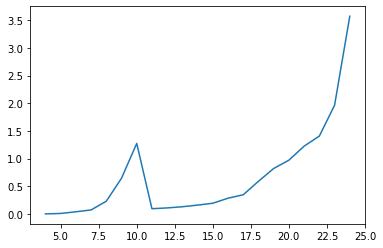

In [65]:
tick_labels_x = [tick_label for tick_label in range(4,25)]
plt.plot(tick_labels_x, means_of_solutions)

As one could see from the graph the time complexity grows exponentially with the grows of istances.

<p>Last consideration one can do it's about the grows of number of variables and constraint respect to grows of istance.
Let be $n = |N|$, $m = |A|$ and $k$ = number_of_product one have $5n + m + nk$ variables ($nk$ is given by the $z_{ik}$) and  $7n + m + k + nk$ ($nk$ is given by the the constraint (6)) number of costraints.</p>
<p>So the number of variables and constraint could be exponential in $n$ depending on the value of $k$ (for example if $k$ = $n^q$ with $q \ge 1$ and so having O($n^{q}$) variables and constraints).</p>